In [40]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd


In [41]:
data = pd.read_csv(r'Assignment 3_attachments\Assignment 3_attachments\your_data.csv')
data = data.iloc[:, 1:] 


data.head()

AST  serum creatinine  age  fasting blood sugar  eyesight(right)  \
0   22               1.0   55                   94              0.6   
1   27               1.1   70                  147              0.7   
2   27               0.8   20                   79              0.5   
3   20               1.0   35                   91              1.2   
4   19               0.8   30                   91              1.0   

   height(cm)  LDL  dental caries  ALT  hearing(right)  smoking  
0         165   75              0   25               1        1  
1         165  126              1   23               2        0  
2         170   93              0   31               1        1  
3         180  102              1   27               1        0  
4         165   93              0   13               1        1

In [42]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AST                  159256 non-null  int64  
 1   serum creatinine     159256 non-null  float64
 2   age                  159256 non-null  int64  
 3   fasting blood sugar  159256 non-null  int64  
 4   eyesight(right)      159256 non-null  float64
 5   height(cm)           159256 non-null  int64  
 6   LDL                  159256 non-null  int64  
 7   dental caries        159256 non-null  int64  
 8   ALT                  159256 non-null  int64  
 9   hearing(right)       159256 non-null  int64  
 10  smoking              159256 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 13.4 MB


In [43]:
data.columns

Index(['AST', 'serum creatinine', 'age', 'fasting blood sugar',
       'eyesight(right)', 'height(cm)', 'LDL', 'dental caries', 'ALT',
       'hearing(right)', 'smoking'],
      dtype='object')

In [44]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

AST                    int64
age                    int64
fasting blood sugar    int64
height(cm)             int64
LDL                    int64
dental caries          int64
ALT                    int64
hearing(right)         int64
smoking                int64
dtype: object

In [45]:
categorical_features = [col for col in data.columns if data[col].dtype == 'object' or data[col].nunique() < 10 and col != 'smoking']
numerical_features = [col for col in data.columns if col not in categorical_features+['smoking']]
print(categorical_features)

['dental caries', 'hearing(right)']


In [46]:
# Convert specific columns to categorical
data['hearing(right)'] = data['hearing(right)'].astype('category')
data['dental caries'] = data['dental caries'].astype('category')
data['smoking'] = data['smoking'].astype('category')
data.dtypes[data.dtypes == 'category']




dental caries     category
hearing(right)    category
smoking           category
dtype: object

In [47]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

serum creatinine    float64
eyesight(right)     float64
dtype: object

In [48]:
print(data.dtypes)

AST                       int64
serum creatinine        float64
age                       int64
fasting blood sugar       int64
eyesight(right)         float64
height(cm)                int64
LDL                       int64
dental caries          category
ALT                       int64
hearing(right)         category
smoking                category
dtype: object


In [49]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64']).dtypes

AST                      int64
serum creatinine       float64
age                      int64
fasting blood sugar      int64
eyesight(right)        float64
height(cm)               int64
LDL                      int64
ALT                      int64
dtype: object


------ Univariate Analysis for AST ------
Measures of Central Tendency:
Mean: 25.516853368161954
Median: 24.0
Mode: 20

Measures of Dispersion:
Min: 6 , Max: 778
Standard Deviation: 9.464882078028898
Range: 772
Variance: 89.58399275099262

Percentiles and Quartiles:
Q1 (25th percentile): 20.0
Q2 (50th percentile - Median): 24.0
Q3 (75th percentile): 29.0
Interquartile Range (IQR): 9.0

Skewness: 11.59234569223128
kurtosis: 629.5193319842189


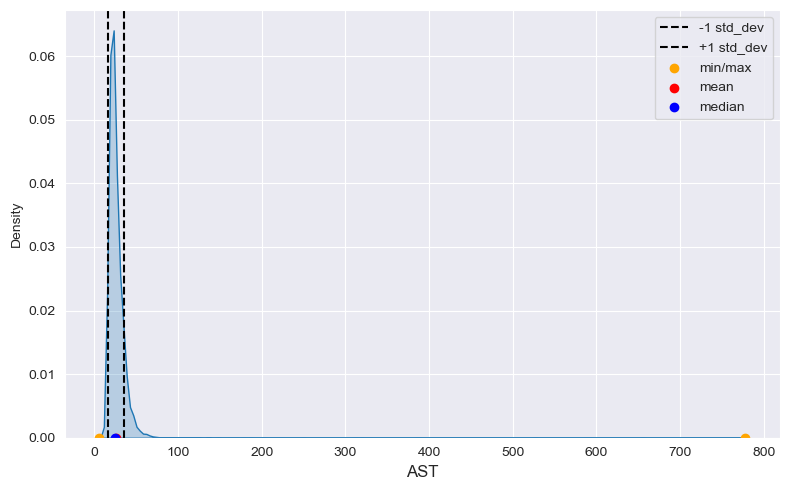


------ Univariate Analysis for serum creatinine ------
Measures of Central Tendency:
Mean: 0.8927644798312152
Median: 0.9
Mode: 0.9

Measures of Dispersion:
Min: 0.1 , Max: 9.9
Standard Deviation: 0.179345954333926
Range: 9.8
Variance: 0.03216497133594667

Percentiles and Quartiles:
Q1 (25th percentile): 0.8
Q2 (50th percentile - Median): 0.9
Q3 (75th percentile): 1.0
Interquartile Range (IQR): 0.19999999999999996

Skewness: 1.5110590703323046
kurtosis: 58.93147789429243


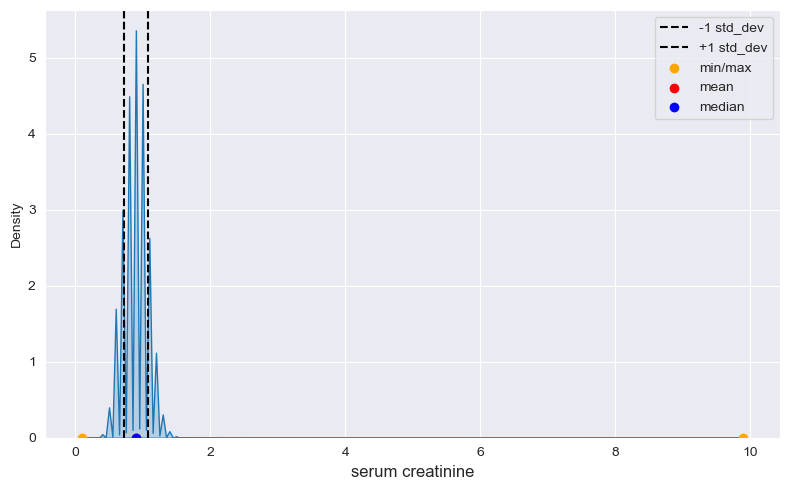


------ Univariate Analysis for age ------
Measures of Central Tendency:
Mean: 44.30662581001658
Median: 40.0
Mode: 40

Measures of Dispersion:
Min: 20 , Max: 85
Standard Deviation: 11.84228584625943
Range: 65
Variance: 140.2397340645164

Percentiles and Quartiles:
Q1 (25th percentile): 40.0
Q2 (50th percentile - Median): 40.0
Q3 (75th percentile): 55.0
Interquartile Range (IQR): 15.0

Skewness: 0.2916973461458878
kurtosis: -0.15879716308708014


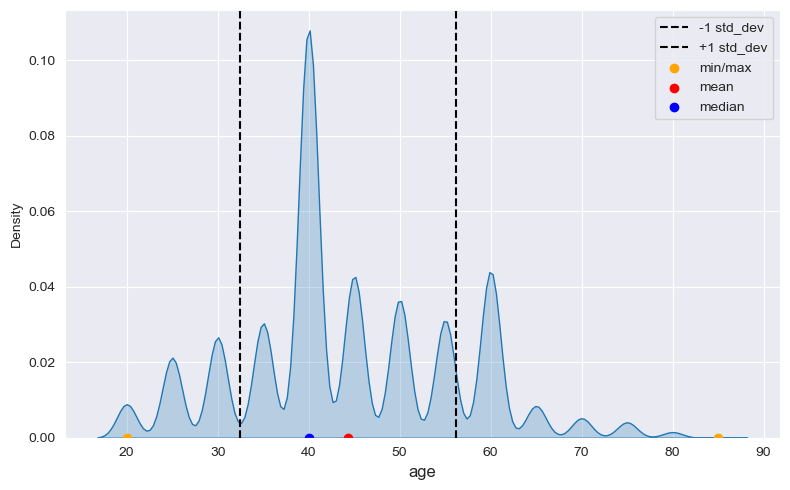


------ Univariate Analysis for fasting blood sugar ------
Measures of Central Tendency:
Mean: 98.35255186617772
Median: 96.0
Mode: 94

Measures of Dispersion:
Min: 46 , Max: 375
Standard Deviation: 15.329740155614578
Range: 329
Variance: 235.00093323866207

Percentiles and Quartiles:
Q1 (25th percentile): 90.0
Q2 (50th percentile - Median): 96.0
Q3 (75th percentile): 103.0
Interquartile Range (IQR): 13.0

Skewness: 3.461099039475446
kurtosis: 27.200003632838072


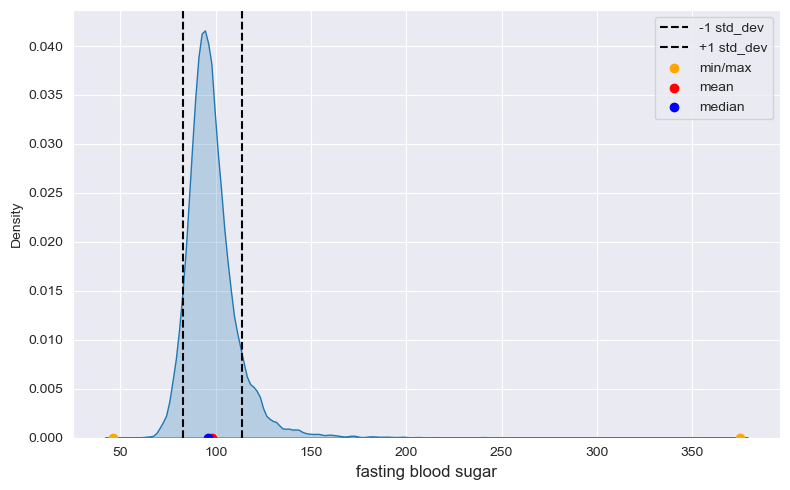


------ Univariate Analysis for eyesight(right) ------
Measures of Central Tendency:
Mean: 1.0009889737278344
Median: 1.0
Mode: 1.0

Measures of Dispersion:
Min: 0.1 , Max: 9.9
Standard Deviation: 0.39229858190863276
Range: 9.8
Variance: 0.15389817736752423

Percentiles and Quartiles:
Q1 (25th percentile): 0.8
Q2 (50th percentile - Median): 1.0
Q3 (75th percentile): 1.2
Interquartile Range (IQR): 0.3999999999999999

Skewness: 8.486849095554883
kurtosis: 192.72934663210577


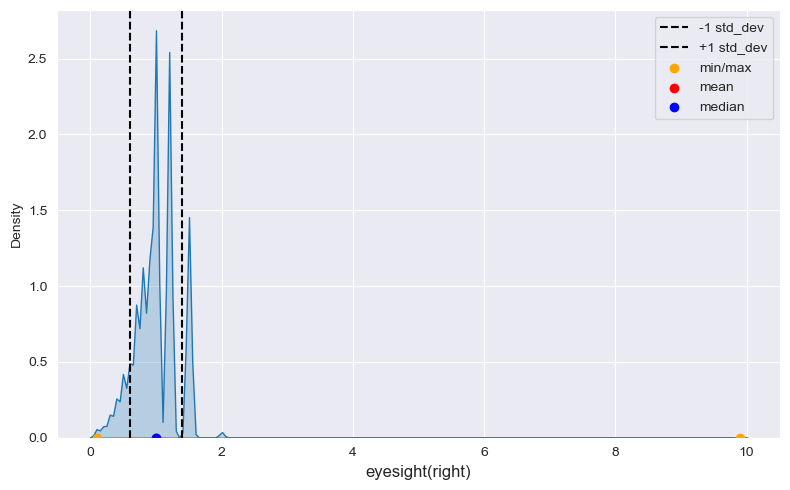


------ Univariate Analysis for height(cm) ------
Measures of Central Tendency:
Mean: 165.2669287185412
Median: 165.0
Mode: 170

Measures of Dispersion:
Min: 135 , Max: 190
Standard Deviation: 8.818969845198085
Range: 55
Variance: 77.77422913051312

Percentiles and Quartiles:
Q1 (25th percentile): 160.0
Q2 (50th percentile - Median): 165.0
Q3 (75th percentile): 170.0
Interquartile Range (IQR): 10.0

Skewness: -0.2699148051800865
kurtosis: -0.5307732813493358


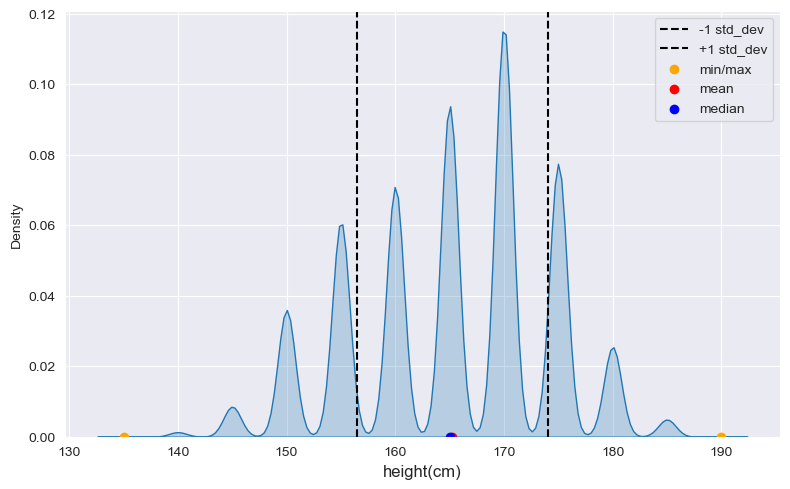


------ Univariate Analysis for LDL ------
Measures of Central Tendency:
Mean: 114.60768197116592
Median: 114.0
Mode: 112

Measures of Dispersion:
Min: 1 , Max: 1860
Standard Deviation: 28.158931398170278
Range: 1859
Variance: 792.9254174868599

Percentiles and Quartiles:
Q1 (25th percentile): 95.0
Q2 (50th percentile - Median): 114.0
Q3 (75th percentile): 133.0
Interquartile Range (IQR): 38.0

Skewness: 6.8748102130205035
kurtosis: 323.6312981578736


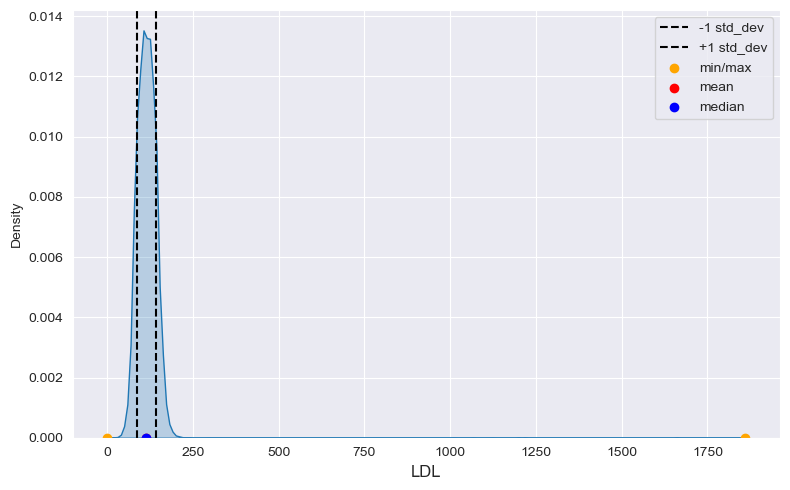


------ Univariate Analysis for ALT ------
Measures of Central Tendency:
Mean: 26.550296378158436
Median: 22.0
Mode: 15

Measures of Dispersion:
Min: 1 , Max: 2914
Standard Deviation: 17.75307013818495
Range: 2913
Variance: 315.1714993313142

Percentiles and Quartiles:
Q1 (25th percentile): 16.0
Q2 (50th percentile - Median): 22.0
Q3 (75th percentile): 32.0
Interquartile Range (IQR): 16.0

Skewness: 34.8300119320999
kurtosis: 4870.241909045784


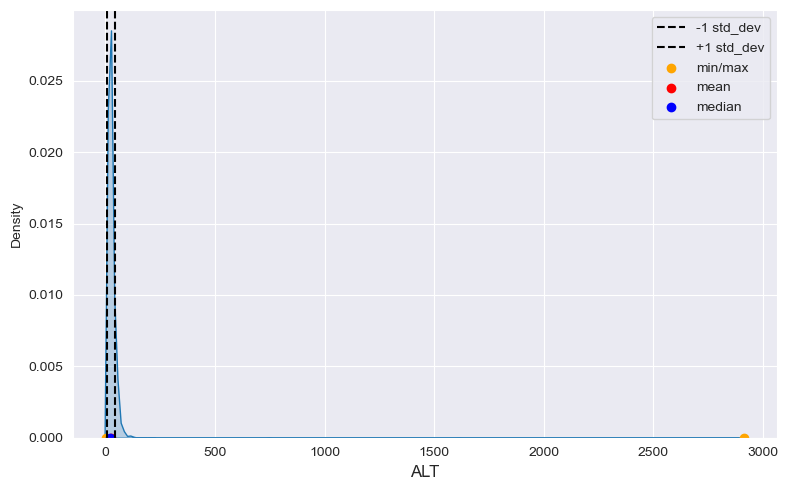

In [50]:
def univariate_numeric(data, group):
    size = len(group)

    for i in group:
        
        # Measures of Central Tendency
        mean = data[i].mean()
        median = data[i].median()
        mode = data[i].mode().iloc[0]

        # Measures of Dispersion
        min = data[i].min()
        max = data[i].max()
        std_deviation = data[i].std()
        range = max - min
        variance = data[i].var()

        # Percentiles and Quartiles
        percentiles = np.percentile(data[i], [25, 50, 75])
        quartiles = {'Q1': percentiles[0], 'Q2': percentiles[1], 'Q3': percentiles[2]}
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # Calculating points of standard deviation
        points = [mean - std_deviation, mean + std_deviation]
        
        # Display results
        print(f"\n------ Univariate Analysis for {i} ------")
        print(f"Measures of Central Tendency:")
        print(f"Mean: {mean}")
        print(f"Median: {median}")
        print(f"Mode: {mode}\n")
        print(f"Measures of Dispersion:")
        print(f"Min: {min} , Max: {max}")
        print(f"Standard Deviation: {std_deviation}")
        print(f"Range: {range}")
        print(f"Variance: {variance}\n")
        print(f"Percentiles and Quartiles:")
        print(f"Q1 (25th percentile): {percentiles[0]}")
        print(f"Q2 (50th percentile - Median): {percentiles[1]}")
        print(f"Q3 (75th percentile): {percentiles[2]}")
        print(f"Interquartile Range (IQR): {percentiles[2] - percentiles[0]}\n")
        print(f"Skewness: {skew}")
        print(f"kurtosis: {kurt}")
        

        # Plotting the variable with every information
        plt.figure(figsize=(8, 5))
        sns.kdeplot(data[i], fill=True)
        plt.axvline(points[0], color='black', linestyle='--', label="-1 std_dev")
        plt.axvline(points[1], color='black', linestyle='--', label="+1 std_dev")
        plt.scatter([min, max], [0, 0], color='orange', label="min/max")
        plt.scatter([mean], [0], color='red', label="mean")
        plt.scatter([median], [0], color='blue', label="median")
        plt.xlabel('{}'.format(i), fontsize=12)
        plt.ylabel('Density')
        plt.legend()
        plt.tight_layout()
        plt.show()

numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
univariate_numeric(data, numerical_columns)


------ Univariate Analysis for dental caries ------
Frequency Distribution:
dental caries
0    127724
1     31532
Name: count, dtype: int64



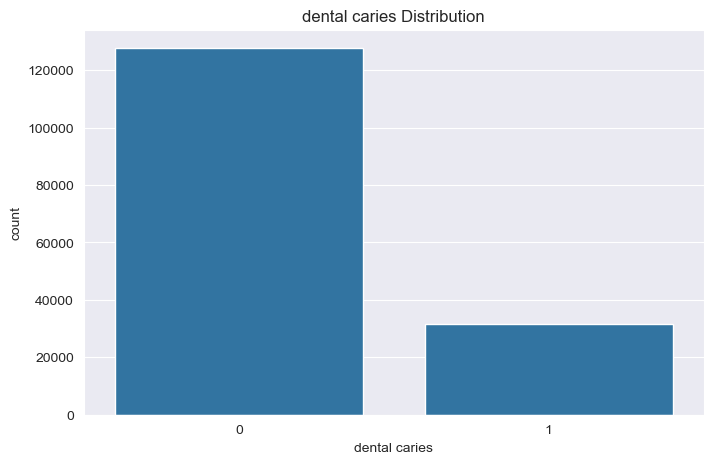


------ Univariate Analysis for hearing(right) ------
Frequency Distribution:
hearing(right)
1    155526
2      3730
Name: count, dtype: int64



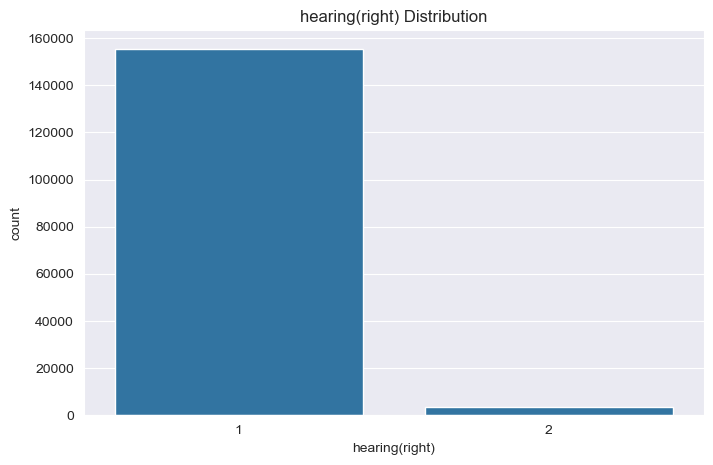


------ Univariate Analysis for smoking ------
Frequency Distribution:
smoking
0    89603
1    69653
Name: count, dtype: int64



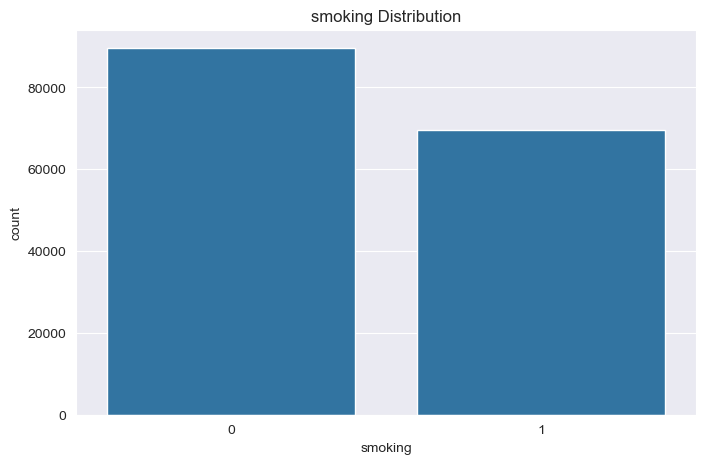

In [51]:
def univariate_category(data, group):
    size = len(group)

    for i in group: 
        frequency_distribution = data[i].value_counts()

        # Display results
        print(f"\n------ Univariate Analysis for {i} ------") 
        print(f"Frequency Distribution:\n{frequency_distribution}\n")

        # Visualization
        plt.figure(figsize=(8, 5))
        sns.countplot(x=data[i], order=data[i].value_counts().index)
        plt.title(f'{i} Distribution') 
        plt.show()
        

categorical_columns = [col for col in data.columns if data[col].dtype == 'object' or data[col].dtype == 'category']
univariate_category(data, categorical_columns)

In [52]:
# finding number of missing values in every variable
data.isnull().sum() 

AST                    0
serum creatinine       0
age                    0
fasting blood sugar    0
eyesight(right)        0
height(cm)             0
LDL                    0
dental caries          0
ALT                    0
hearing(right)         0
smoking                0
dtype: int64

In [53]:
data = data.drop_duplicates()
data.shape

(159244, 11)

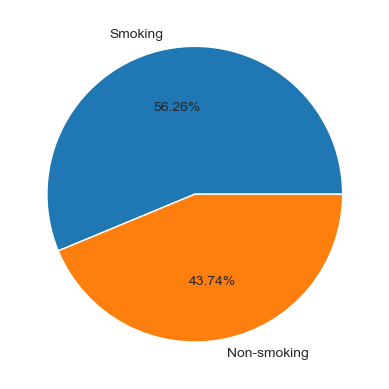

In [54]:
plt.pie(data['smoking'].value_counts(), labels=['Smoking', 'Non-smoking'], autopct='%.2f%%');

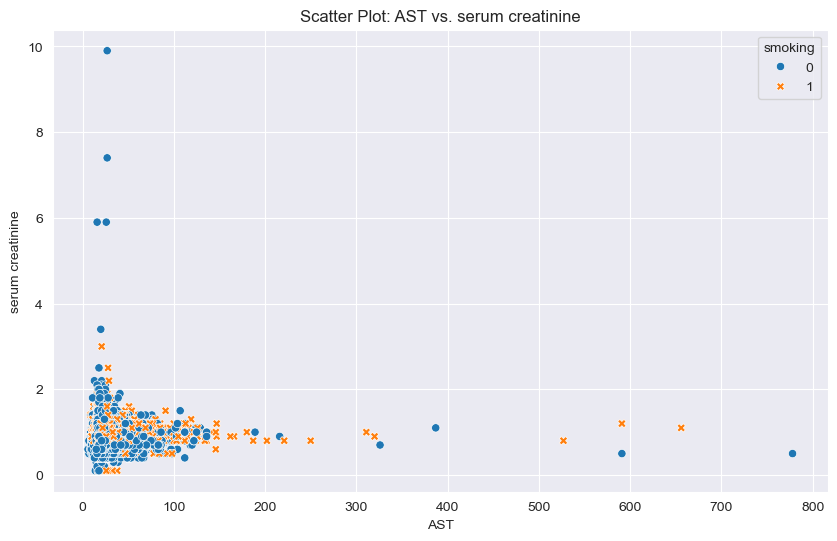

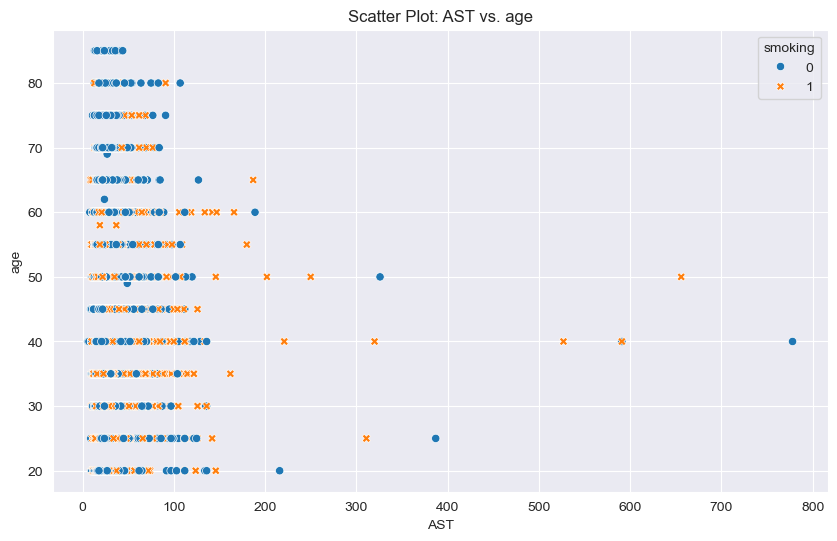

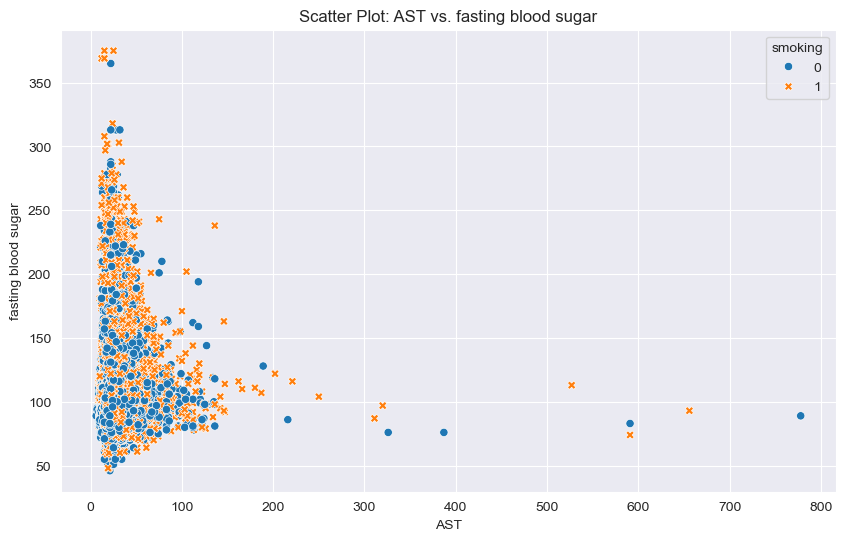

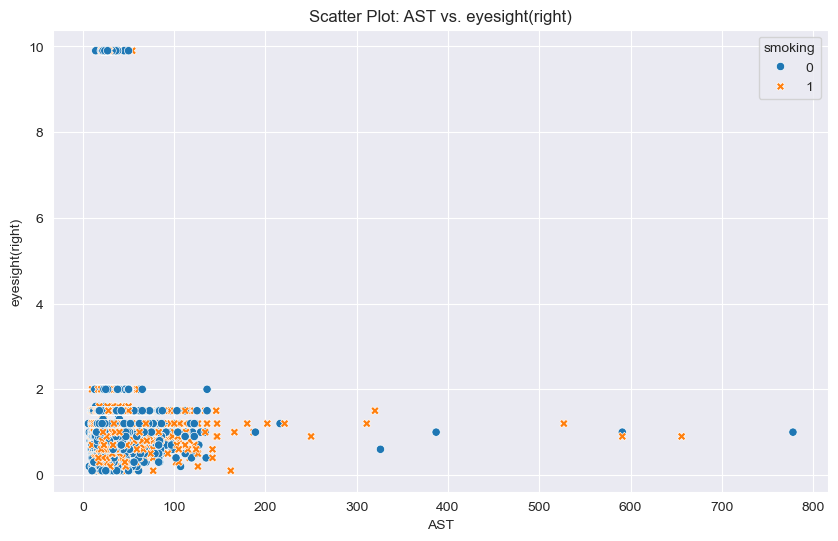

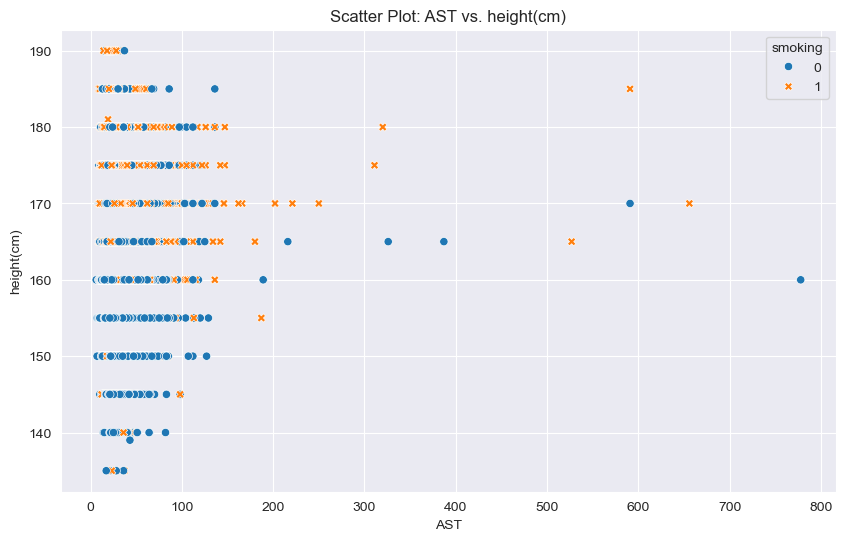

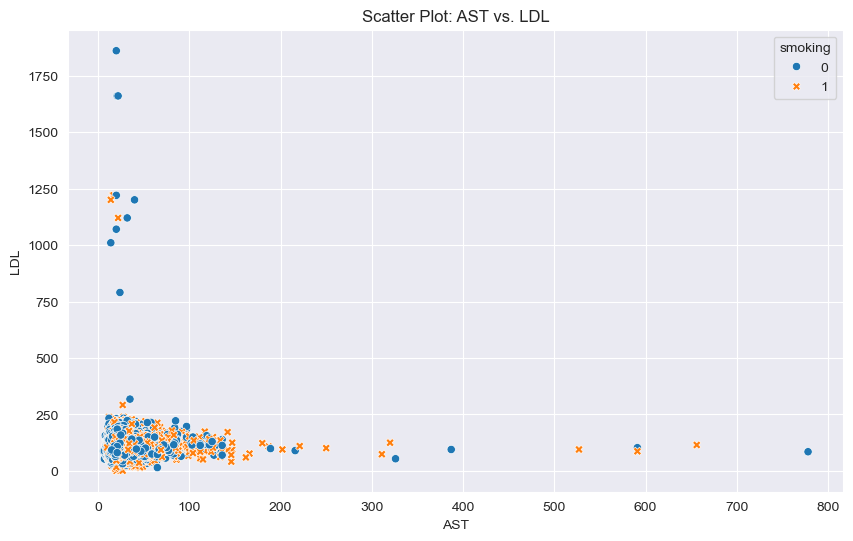

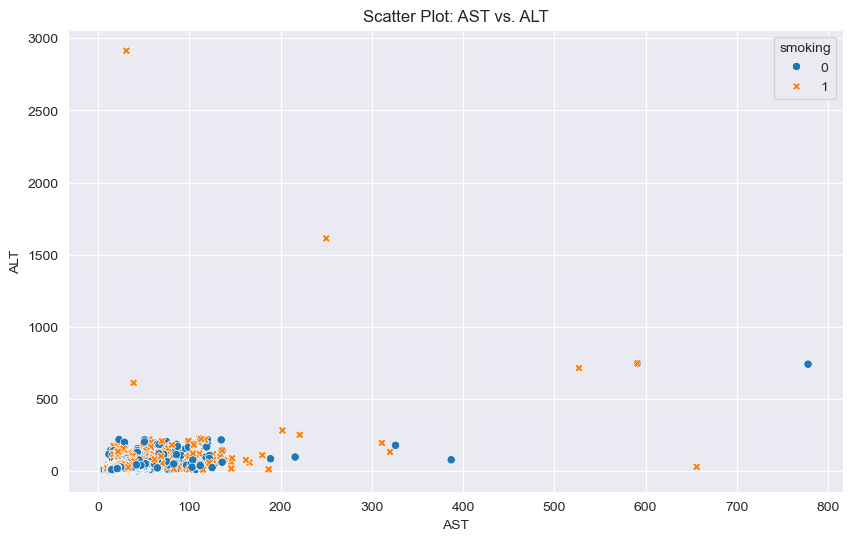

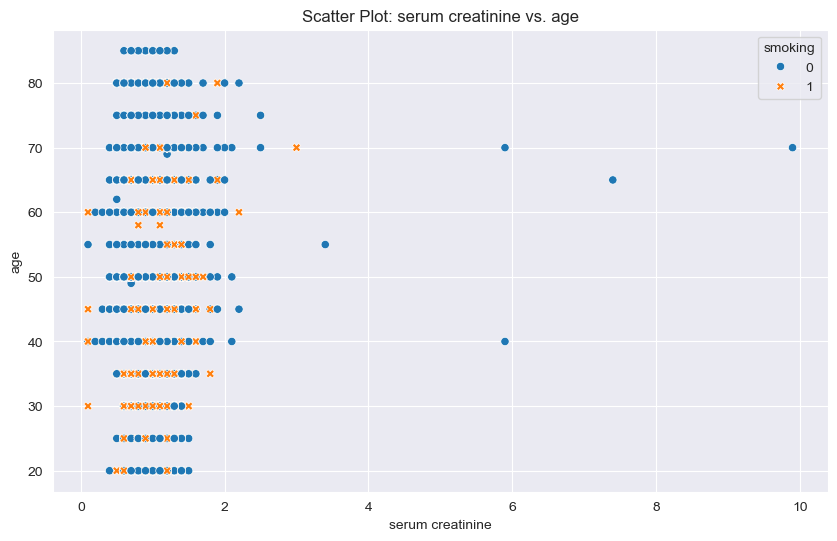

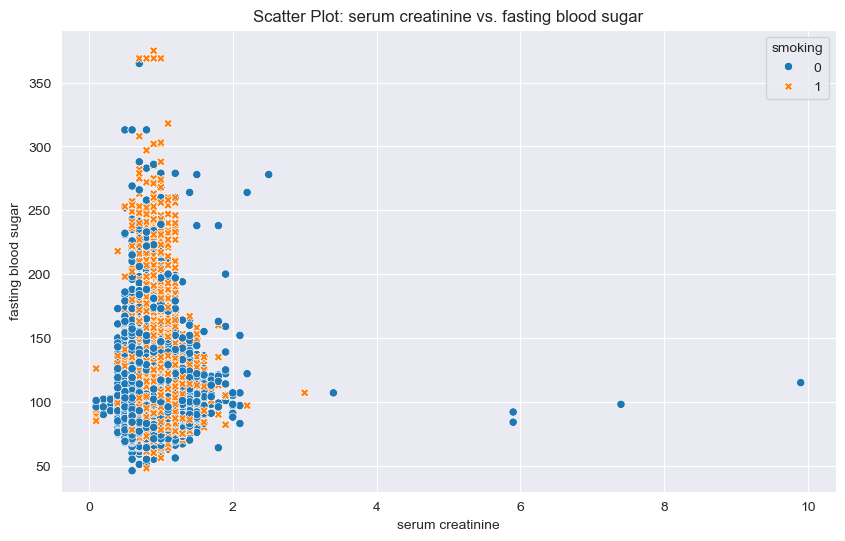

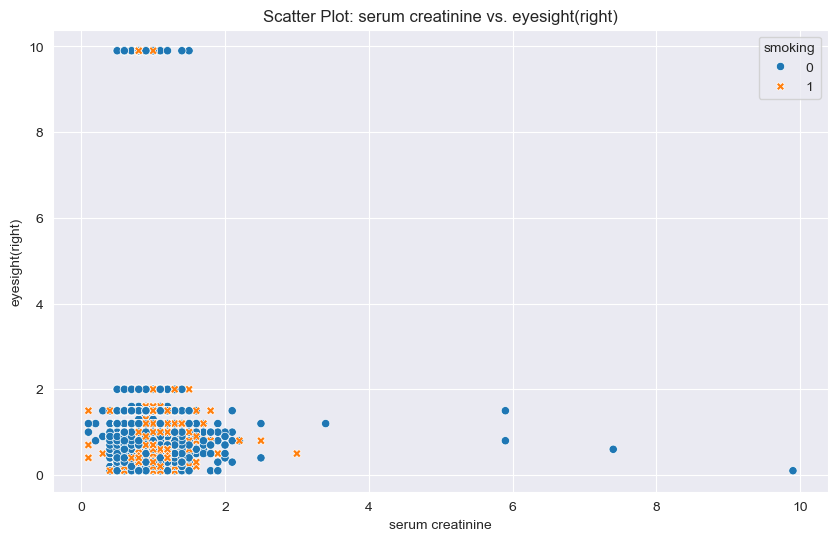

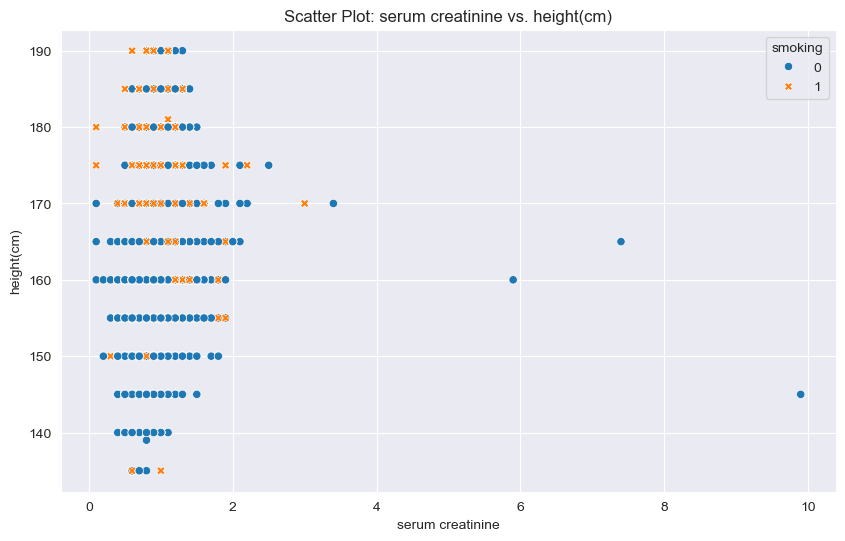

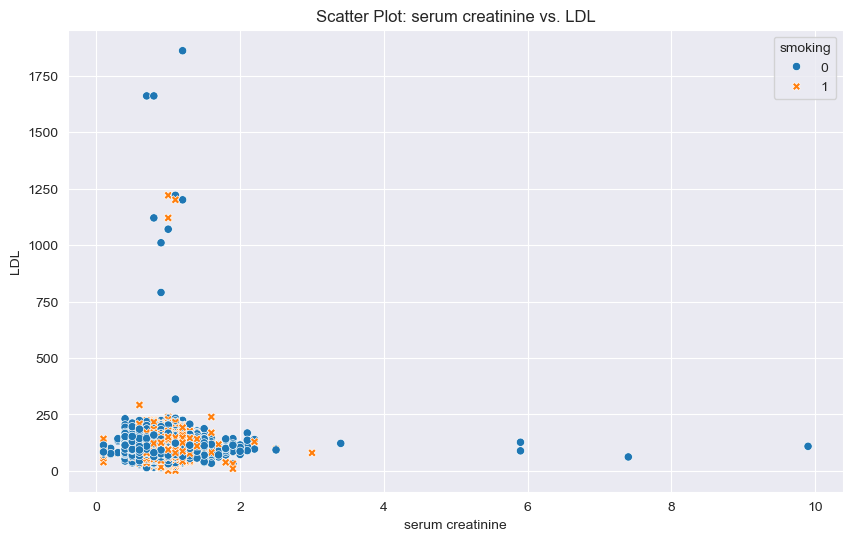

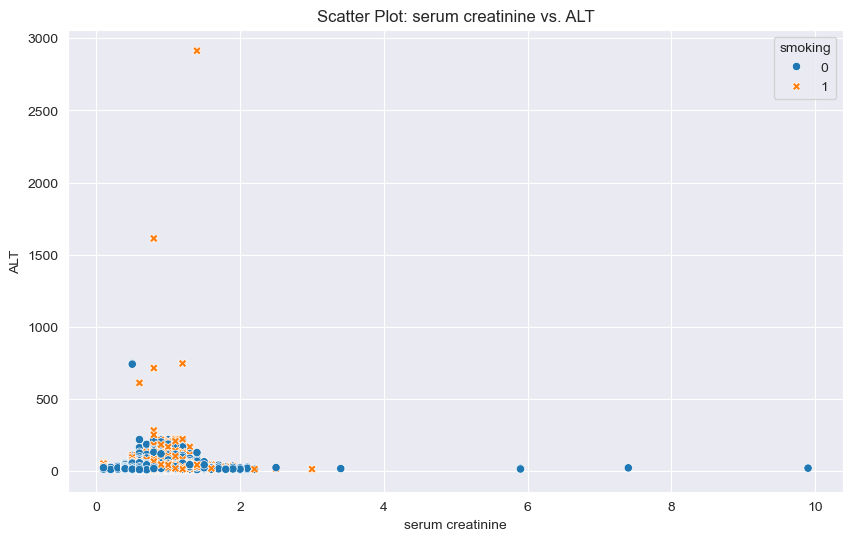

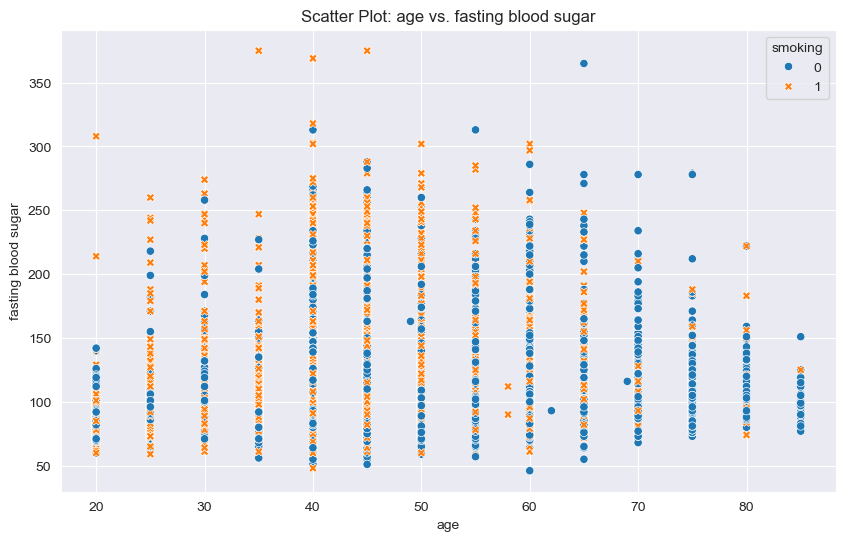

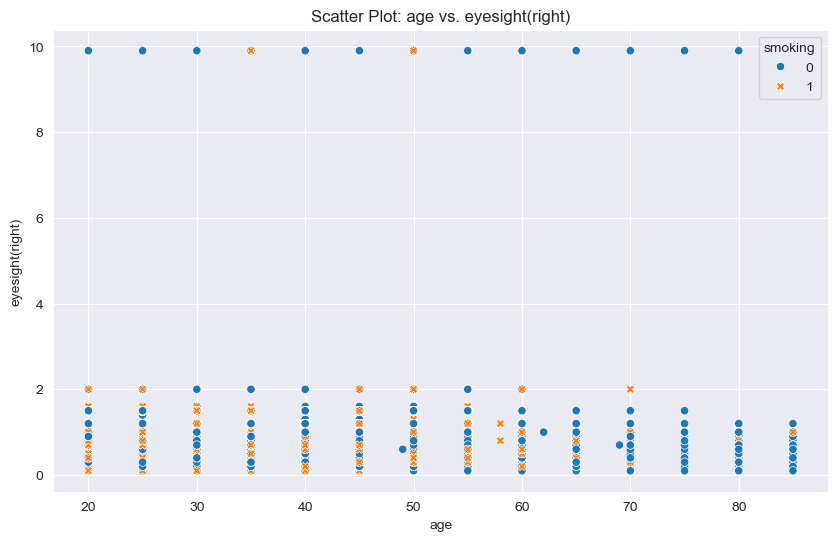

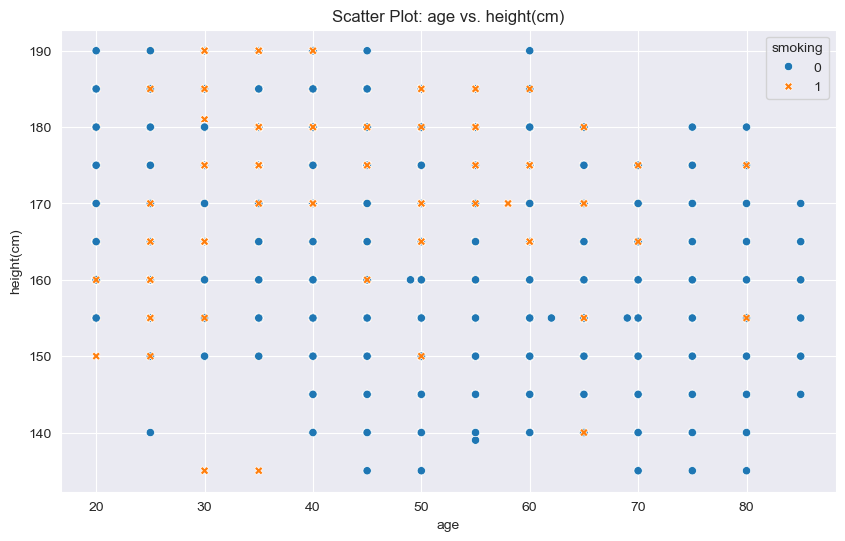

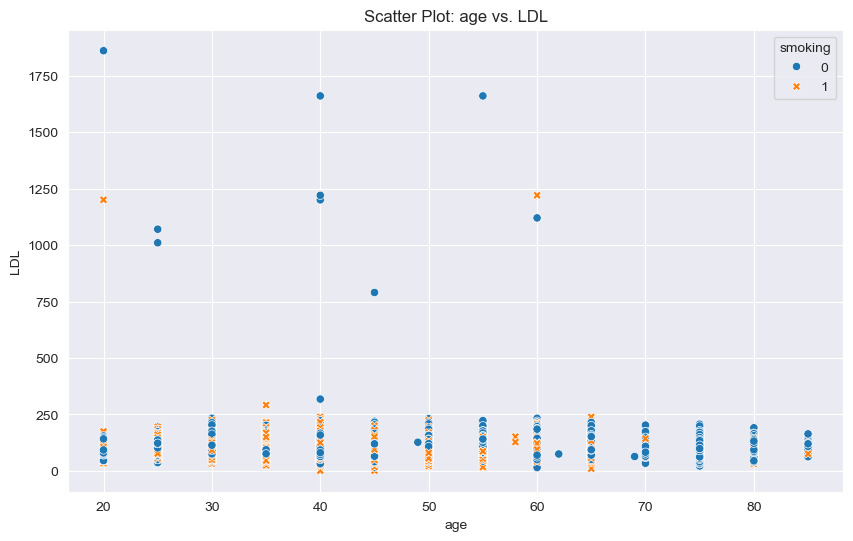

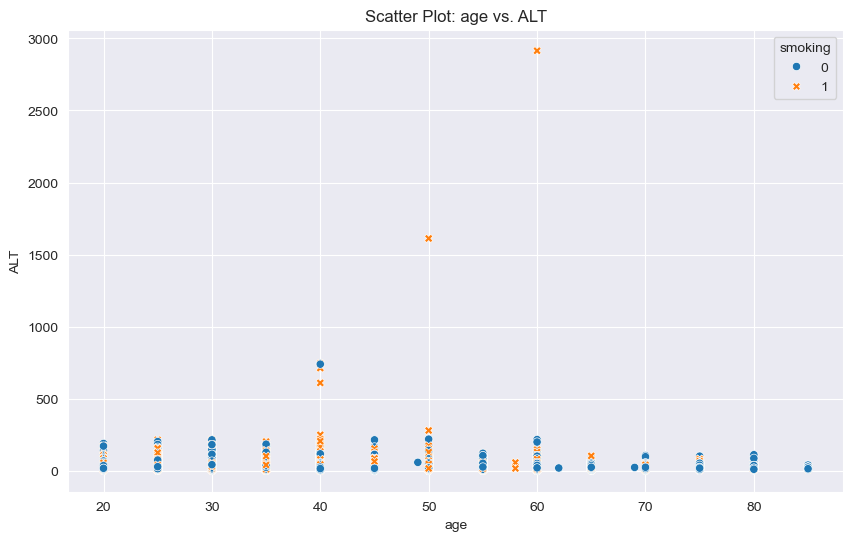

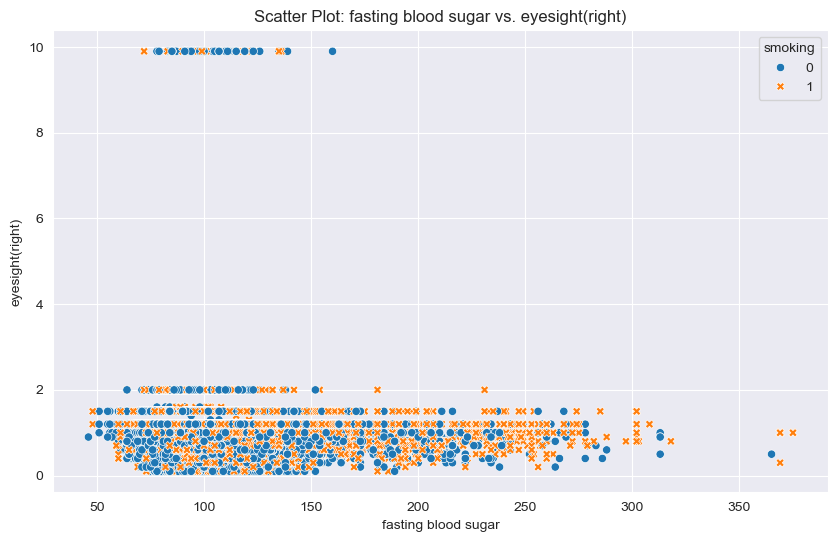

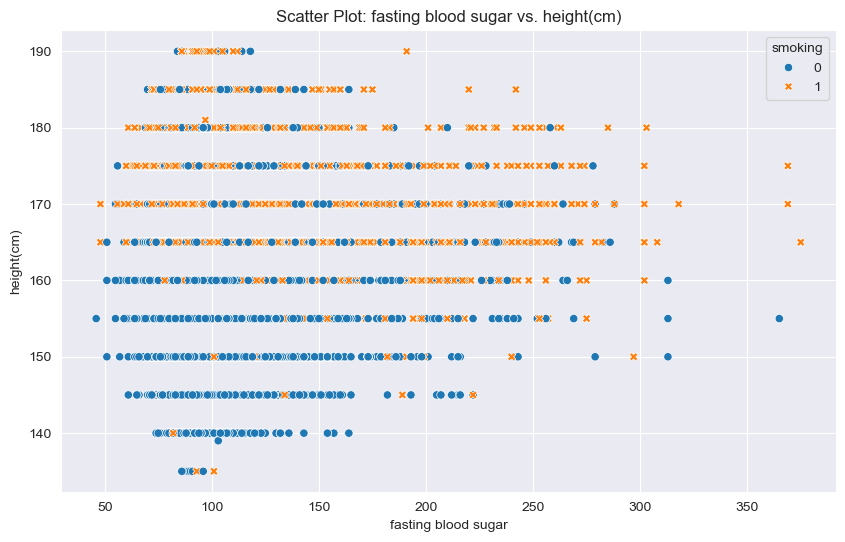

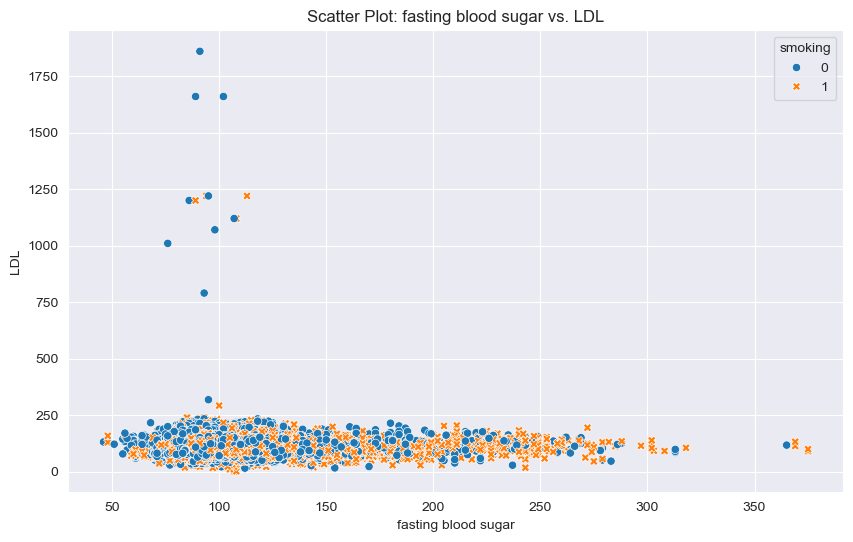

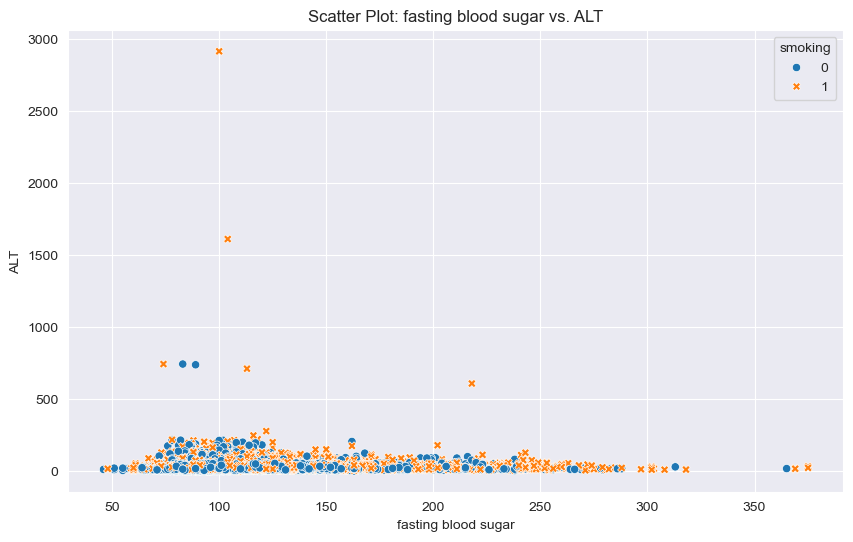

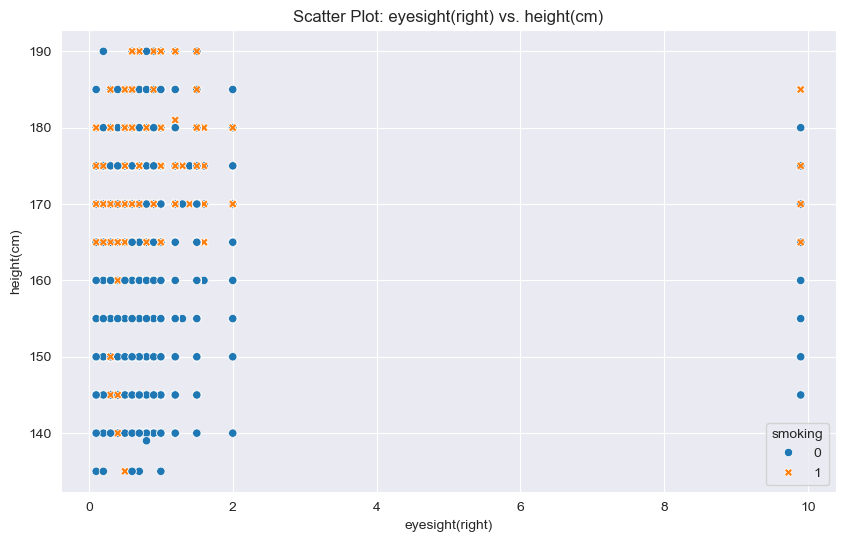

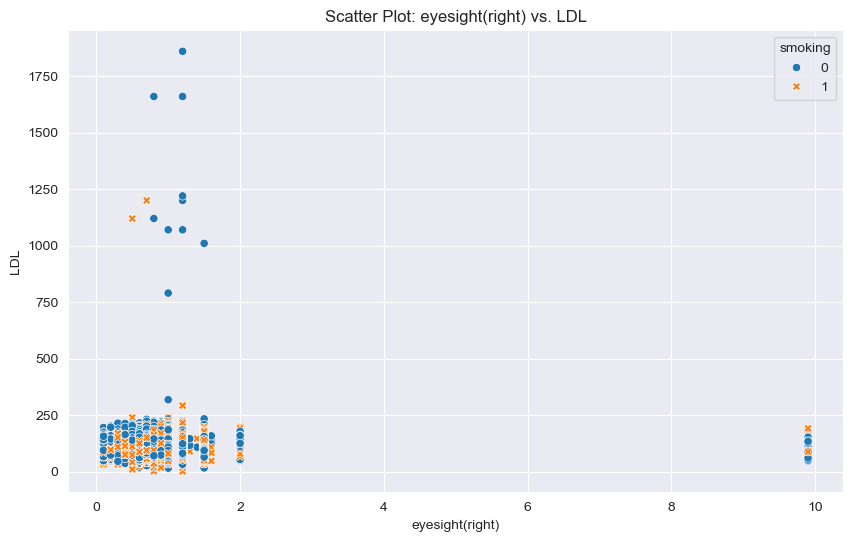

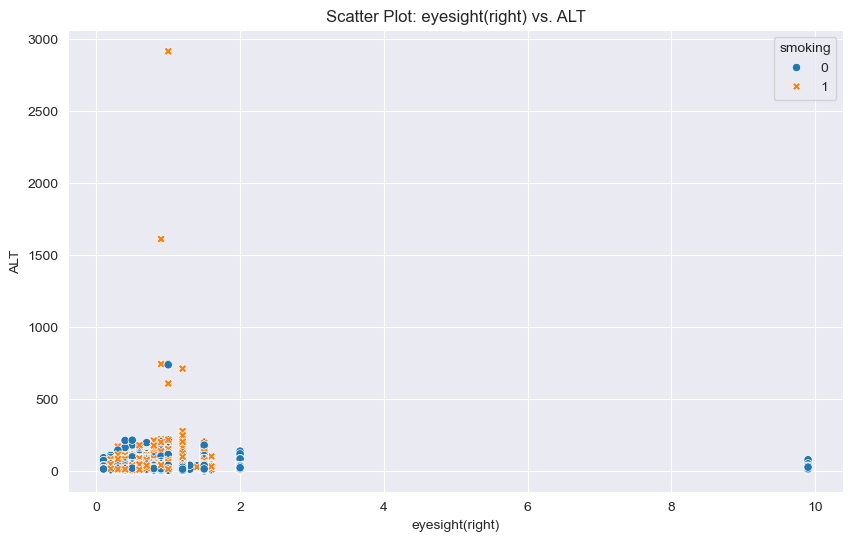

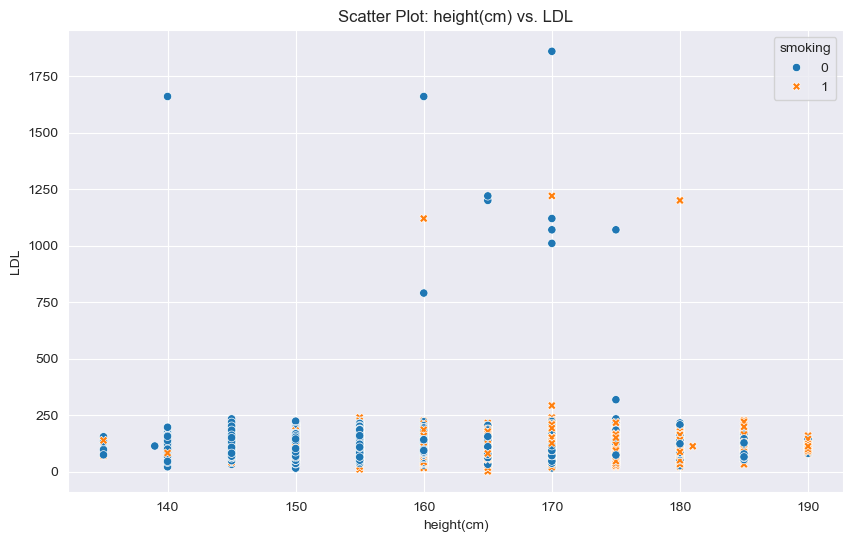

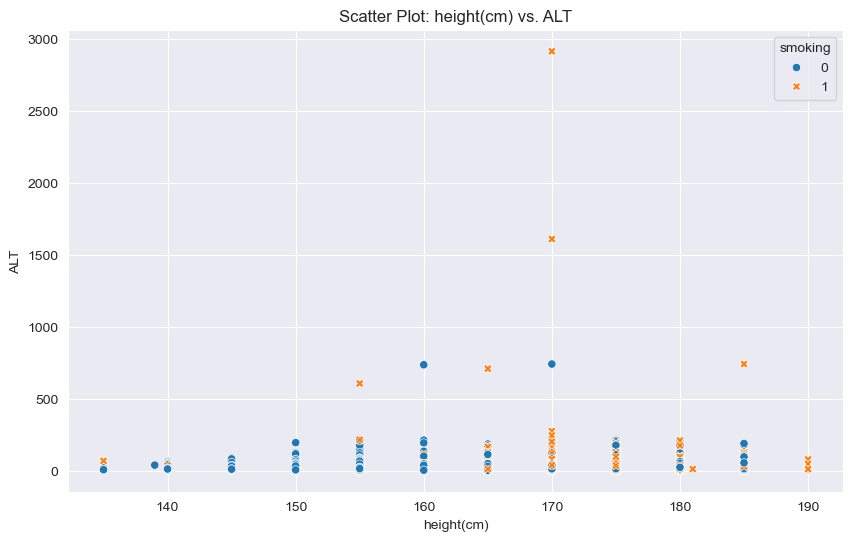

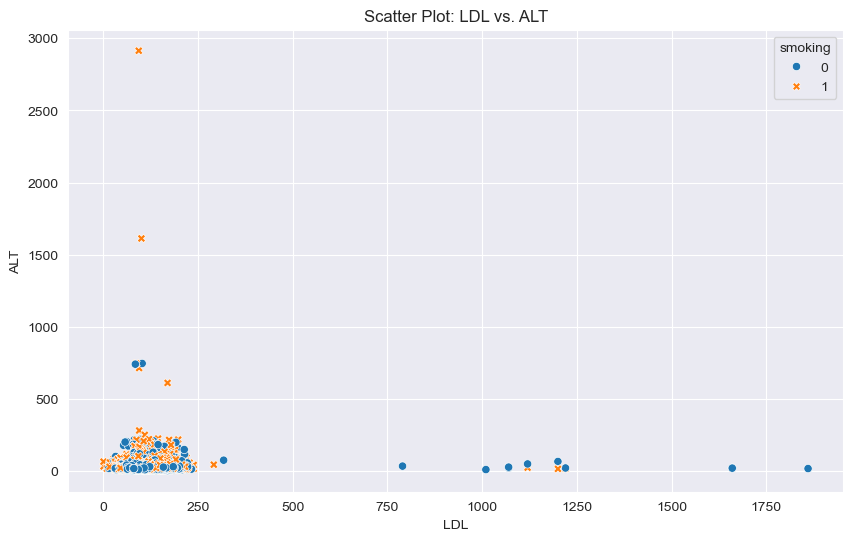

In [55]:
# numeric-numeric relationships
numeric_features = [ 'AST','serum creatinine','age','fasting blood sugar', 'eyesight(right)','height(cm)','LDL','ALT']

for i in range(len(numeric_features)):
    for j in range(i+1, len(numeric_features)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=numeric_features[i], y=numeric_features[j], data=data, hue='smoking', style='smoking')
        plt.title(f'Scatter Plot: {numeric_features[i]} vs. {numeric_features[j]}')
        plt.show()

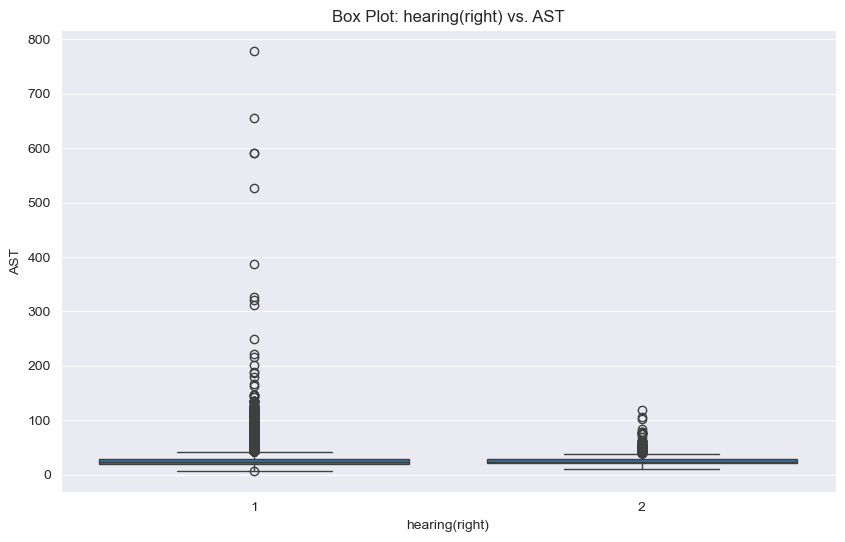

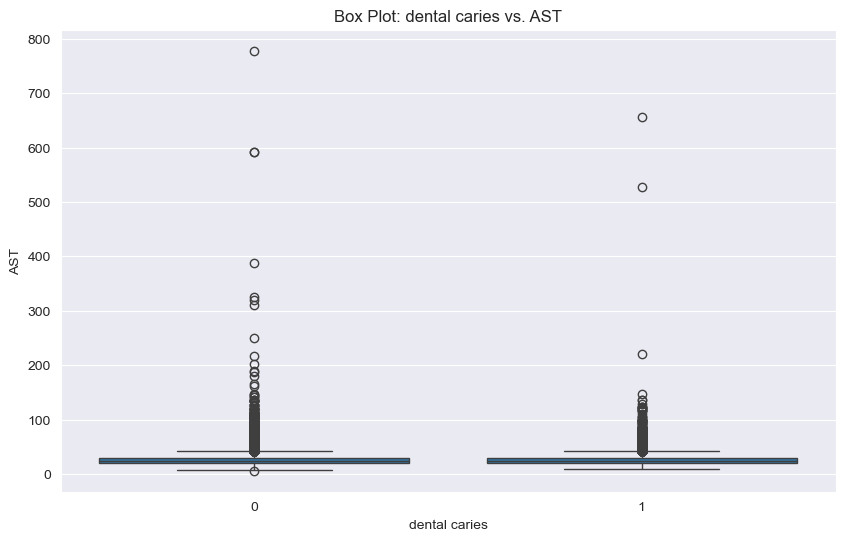

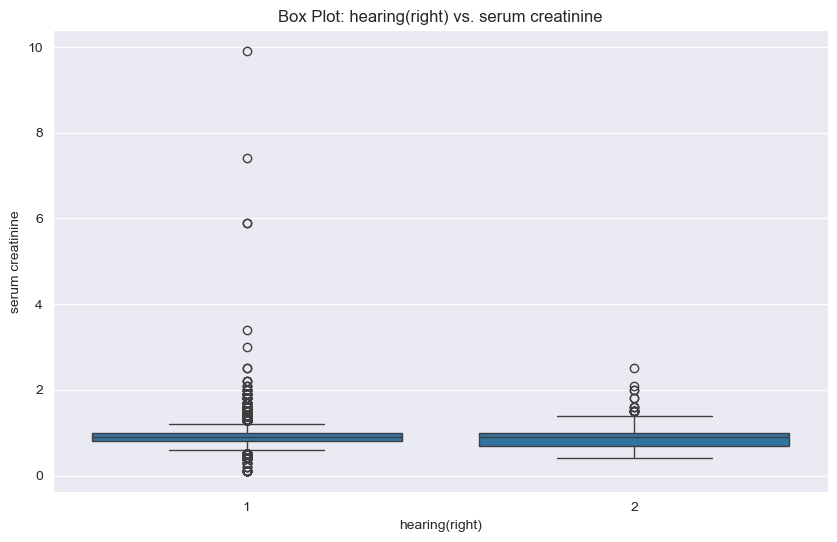

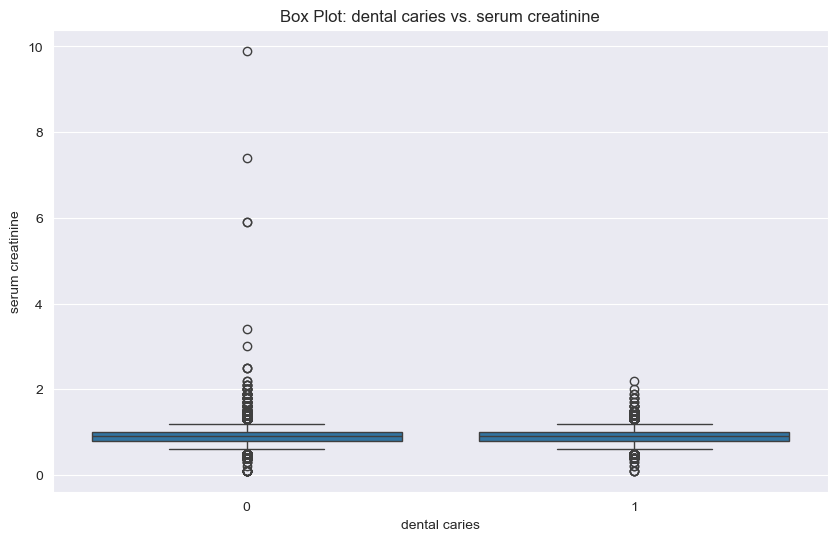

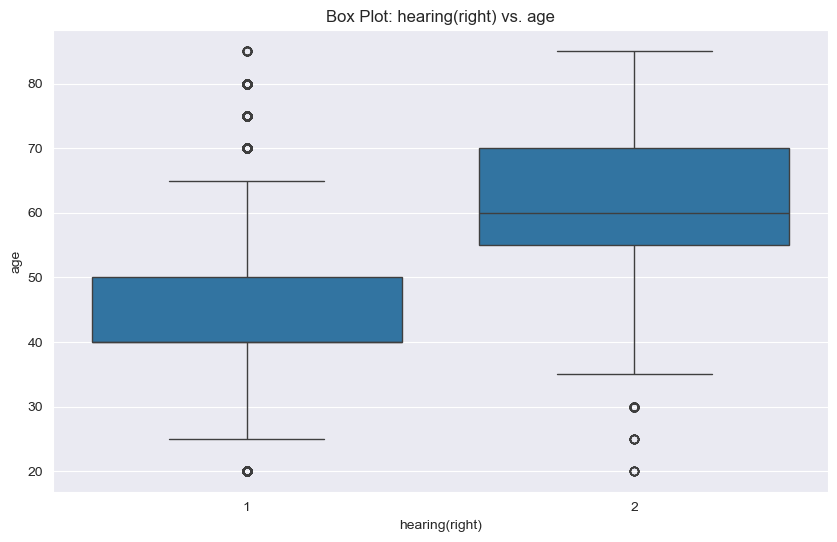

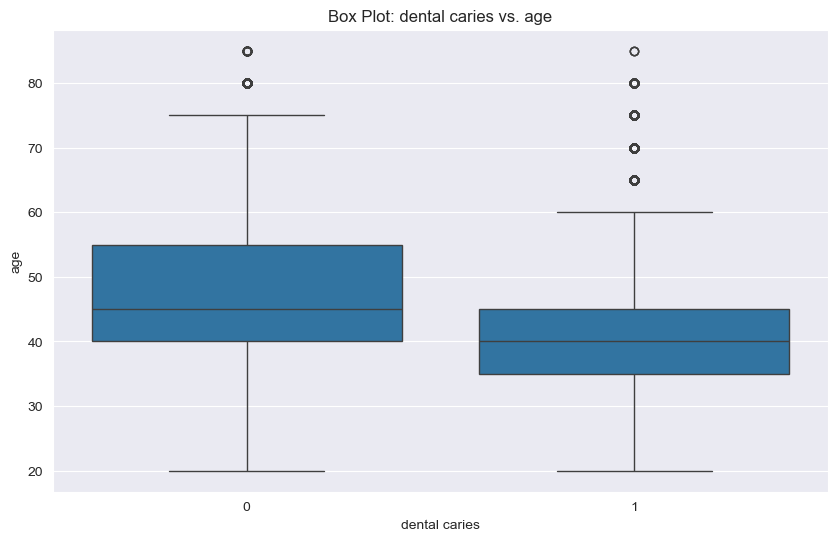

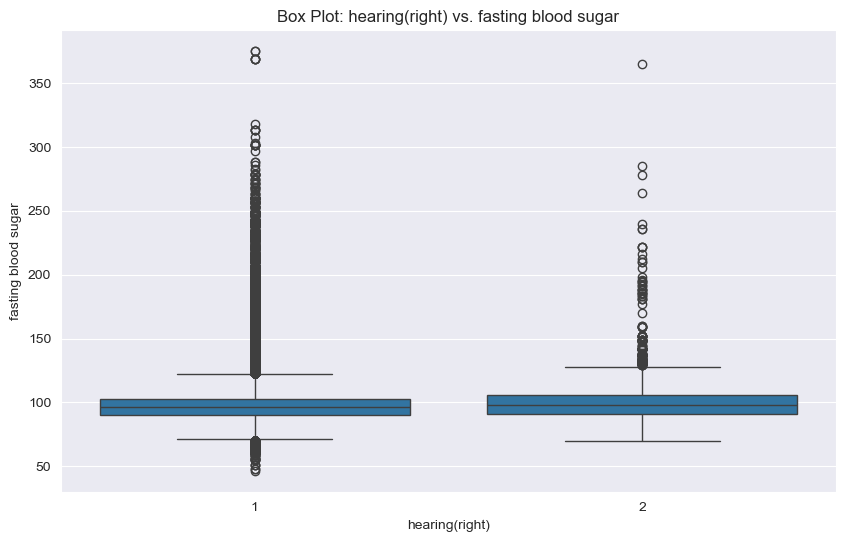

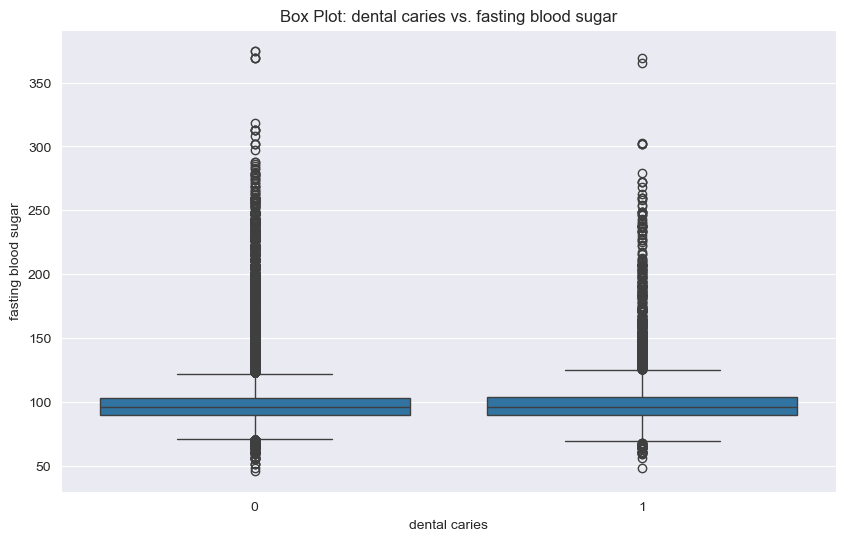

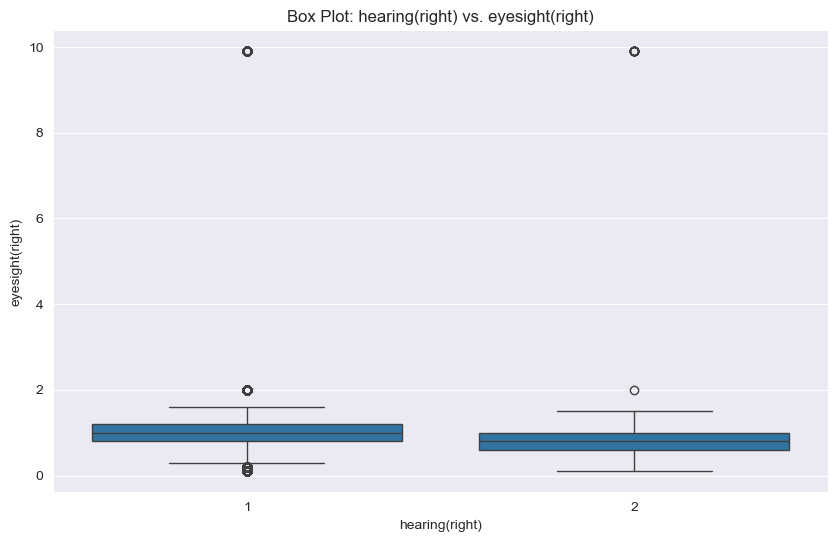

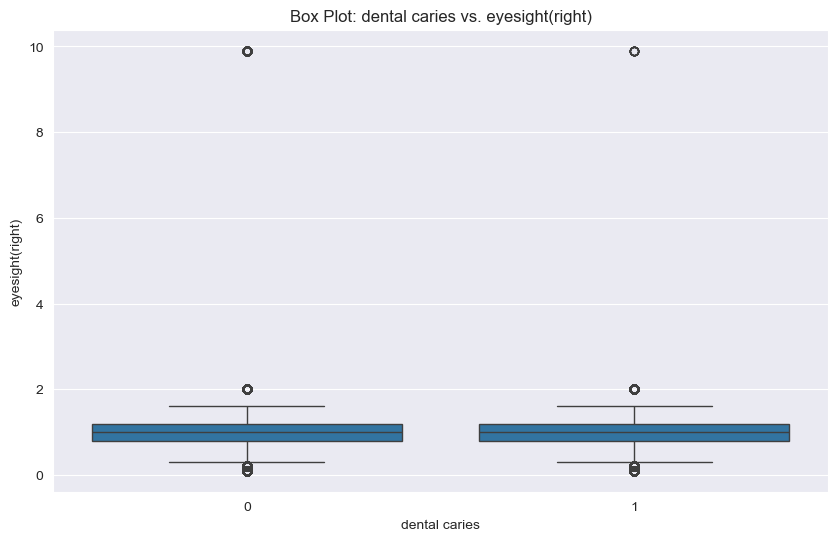

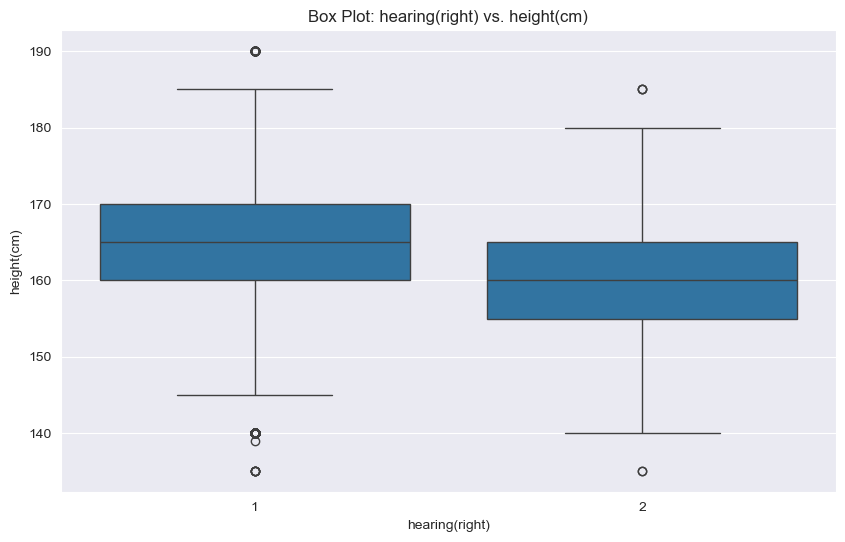

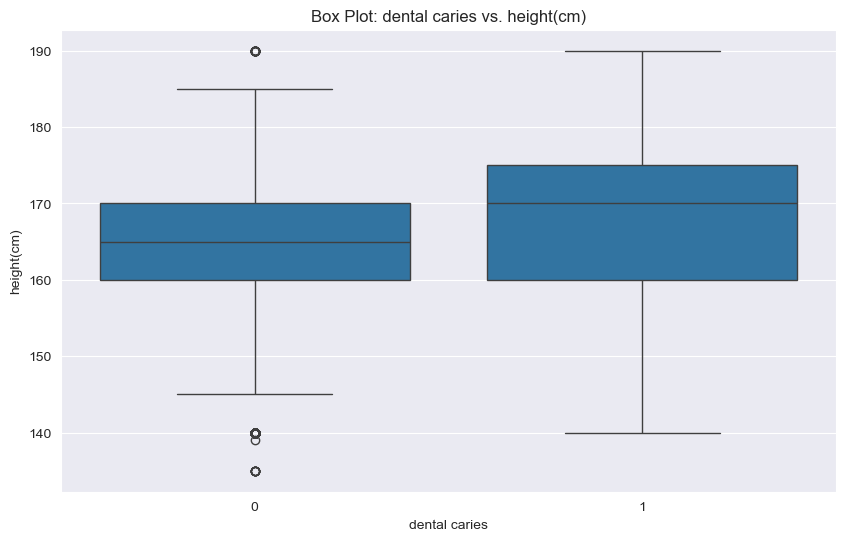

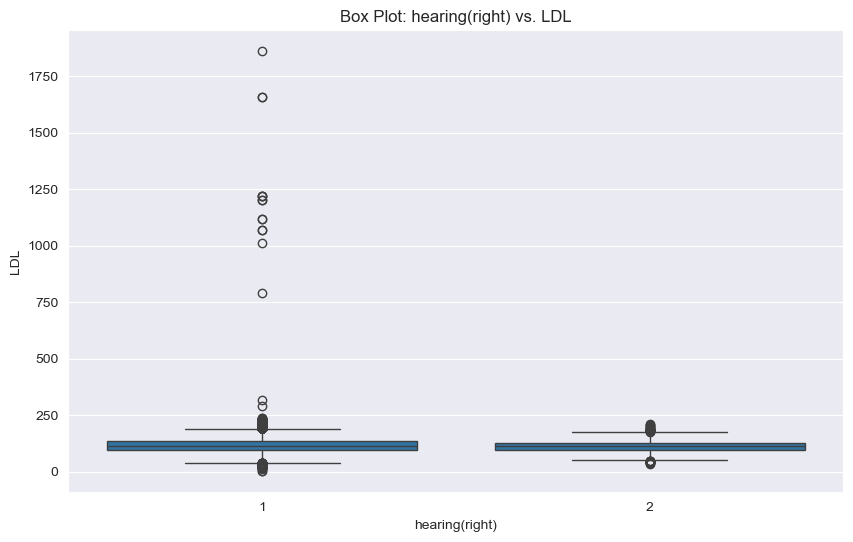

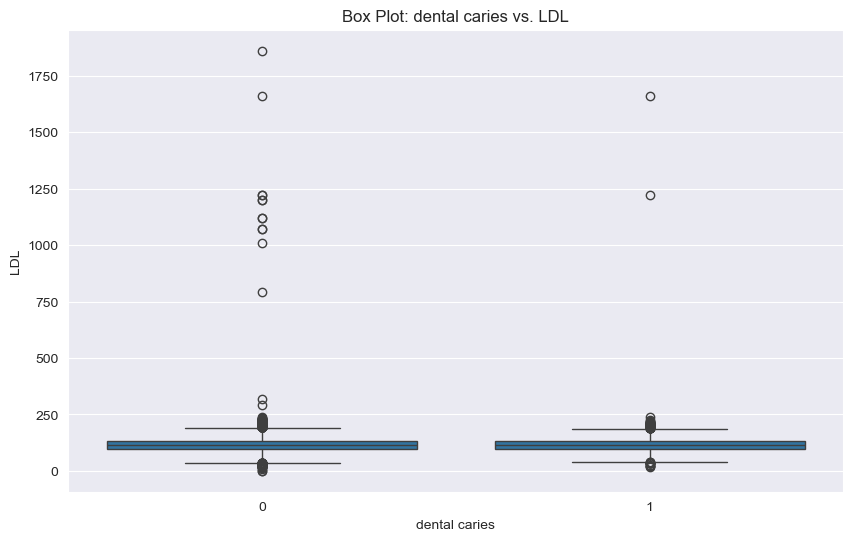

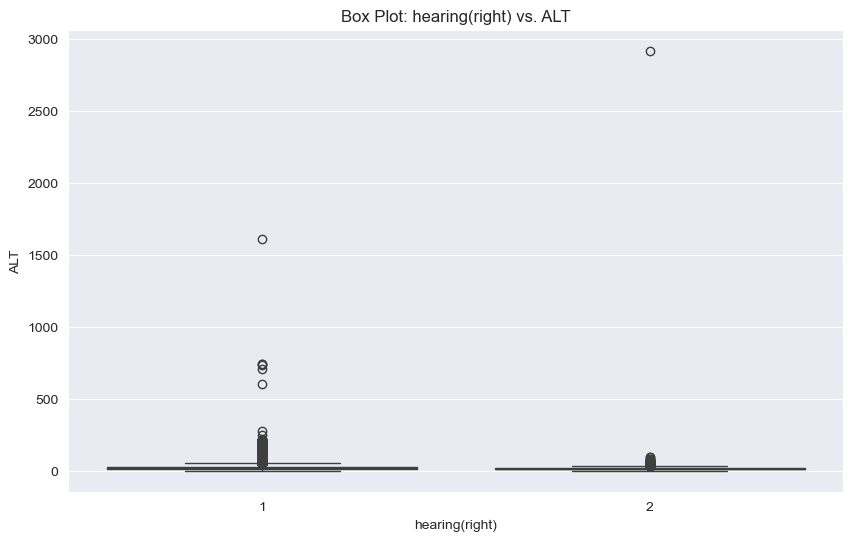

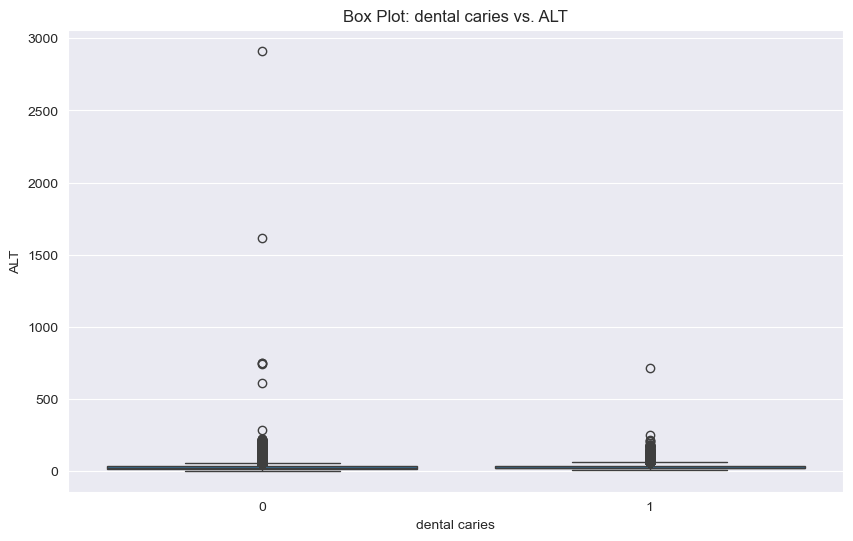

In [56]:
# Box plots for categorical-numeric relationships
categorical_features = [ 'hearing(right)','dental caries']

for feature in numeric_features:
    for cat_feature in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_feature, y=feature, data=data,
                    order=data[cat_feature].value_counts().index)  # Added order parameter
        plt.title(f'Box Plot: {cat_feature} vs. {feature}')
        plt.show()

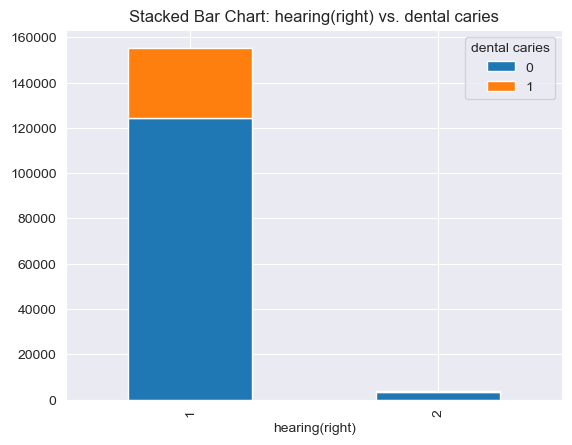

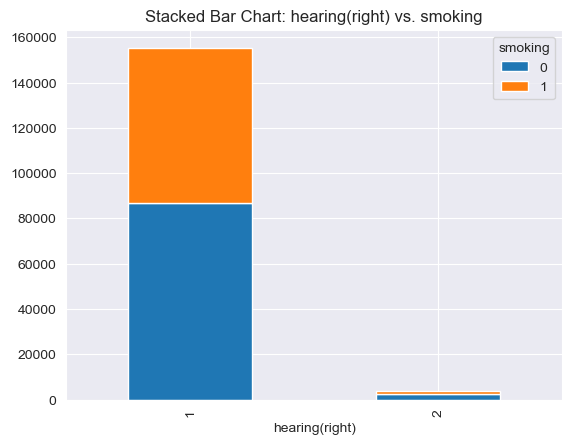

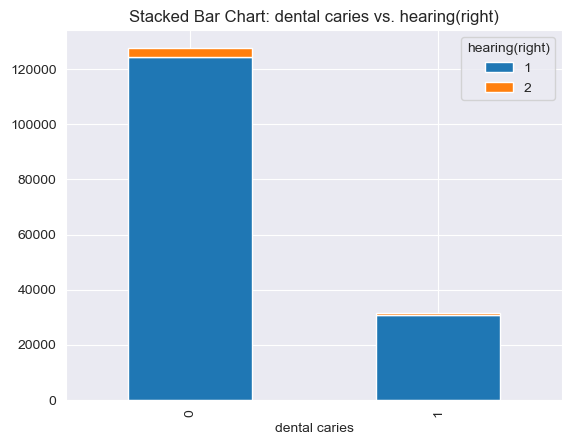

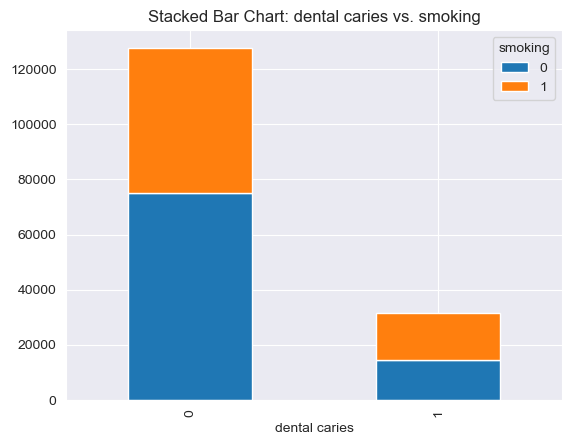

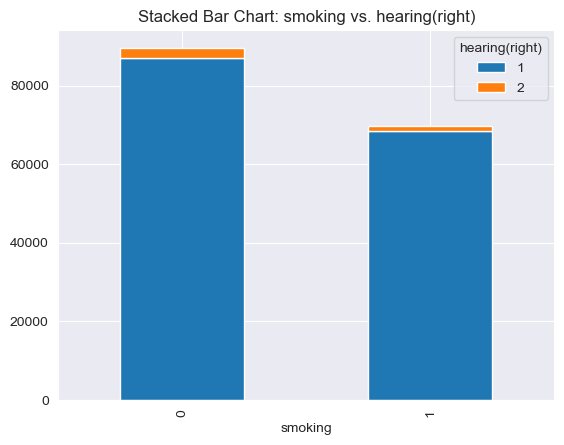

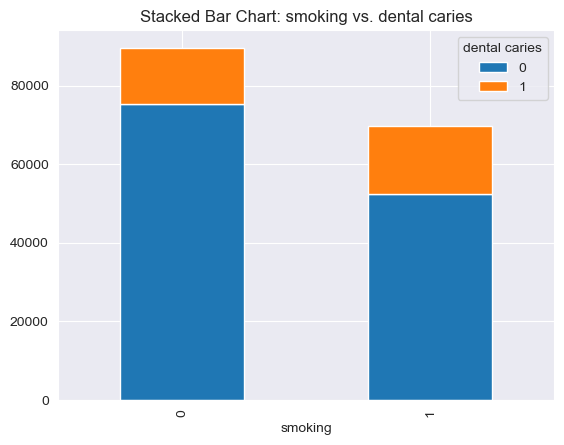

In [57]:
#categorical-categorical relationships 
categorical_features = ['hearing(right)','dental caries', 'smoking']

for feature1 in categorical_features:
    for feature2 in categorical_features:
        if feature1 != feature2:
            cross_tab = pd.crosstab(data[feature1], data[feature2])
            cross_tab.plot(kind='bar', stacked=True)
            plt.title(f'Stacked Bar Chart: {feature1} vs. {feature2}')
            plt.show()

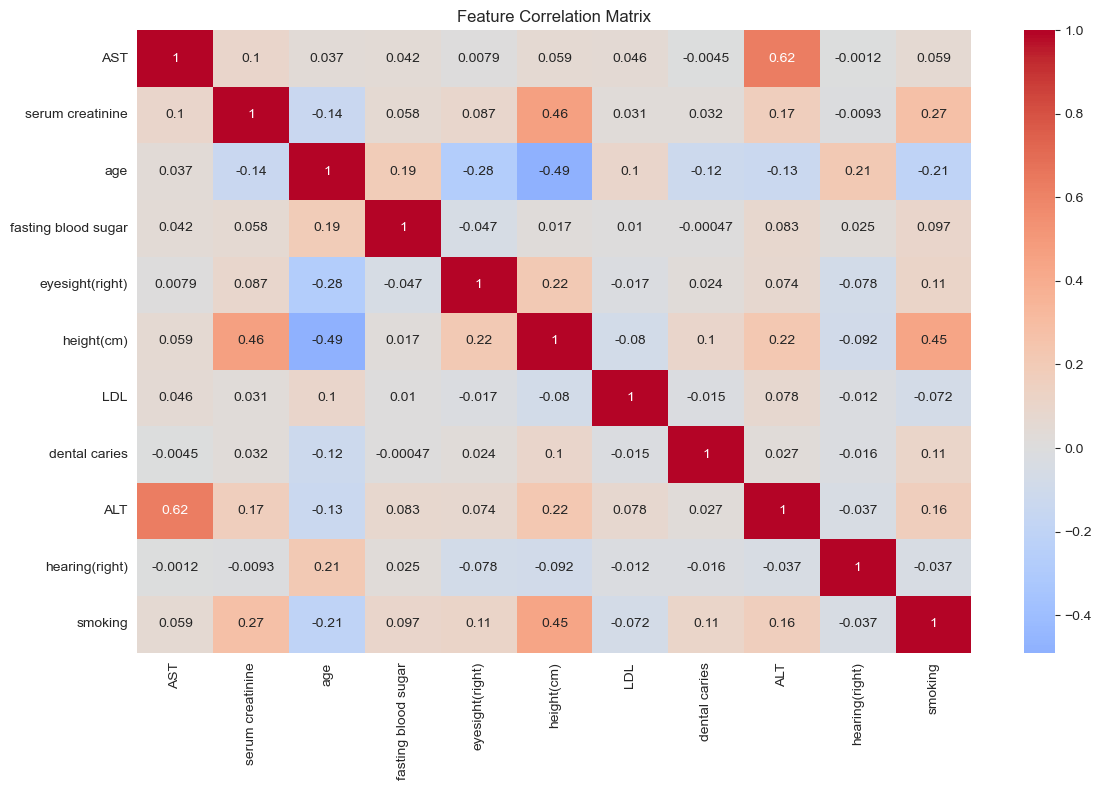

In [58]:
plt.figure(figsize=(12, 8))
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [59]:
numeric_columns_for_pca = ['AST','serum creatinine','age','fasting blood sugar', 'eyesight(right)','height(cm)','LDL','ALT']
scaler_for_pca = StandardScaler()
scaled_features = scaler_for_pca.fit_transform(data[numeric_columns_for_pca])

In [60]:
# Apply PCA for dimensionality reduction
pca_for_replacement = PCA()
principal_components_for_replacement = pca_for_replacement.fit_transform(scaled_features)

# Variance explained by each principal component
explained_variance_ratio = pca_for_replacement.explained_variance_ratio_
# The variable 'principal_components_for_replacement' contains the transformed data
print("Principal Components:")
print(pd.DataFrame(principal_components_for_replacement, columns=[f'PC{i+1}' for i in range(len(numeric_columns_for_pca))]))


Principal Components:
             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      -0.553809 -0.071290  0.598400 -1.221829 -1.199897  0.752464  0.181812   
1      -0.781590  1.959882  3.437423 -0.124149  0.663165  0.359837  0.204884   
2       0.780783 -0.906923 -1.313818 -0.812367 -1.585023 -1.469785 -0.386794   
3       1.481800 -1.416372  0.230128 -0.068742 -0.294895 -0.024670  0.628630   
4      -0.219140 -1.550621 -0.545677 -0.563510 -0.118268 -0.577007 -0.392109   
...          ...       ...       ...       ...       ...       ...       ...   
159239 -0.000256 -0.764723 -2.669005  2.185691  1.247808  1.239482 -0.375953   
159240 -1.791196 -0.165034 -1.207106 -0.283960  0.397527 -0.127401  0.157232   
159241 -1.561474 -1.529622 -1.201586 -0.579726  0.120394 -0.463949  0.166729   
159242 -0.074076 -0.203532  1.936557 -1.140242  0.324669  0.670372 -0.477965   
159243 -1.500439 -0.840717 -1.479581 -0.827616  0.295704  0.815513 -1.520226   

             PC8 

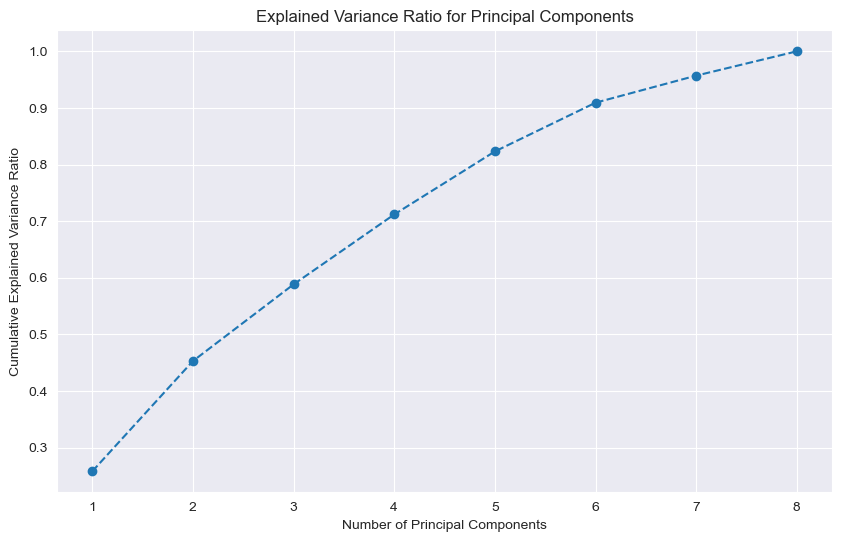

In [61]:
# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio for Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


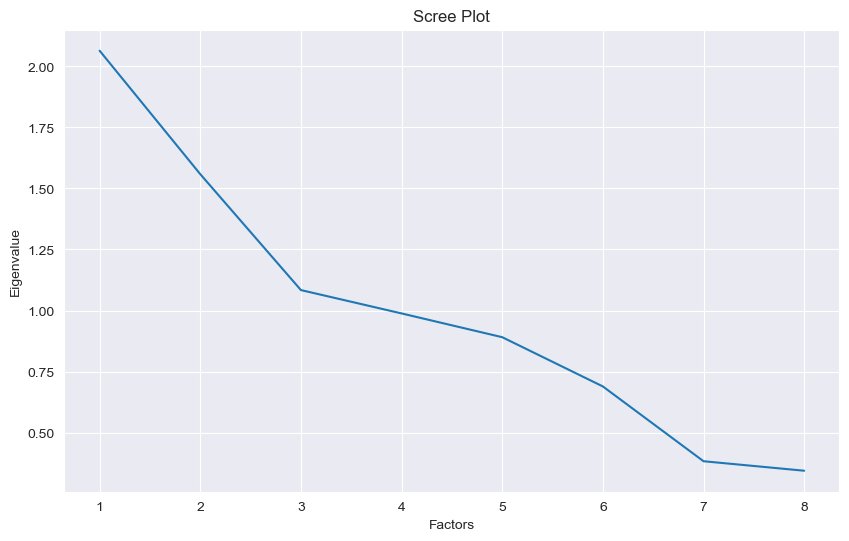

In [62]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation=None, n_factors=5)
fa.fit(scaled_features)
ev, v = fa.get_eigenvalues()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ev) + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

Generating Pairplot for Selected Features...


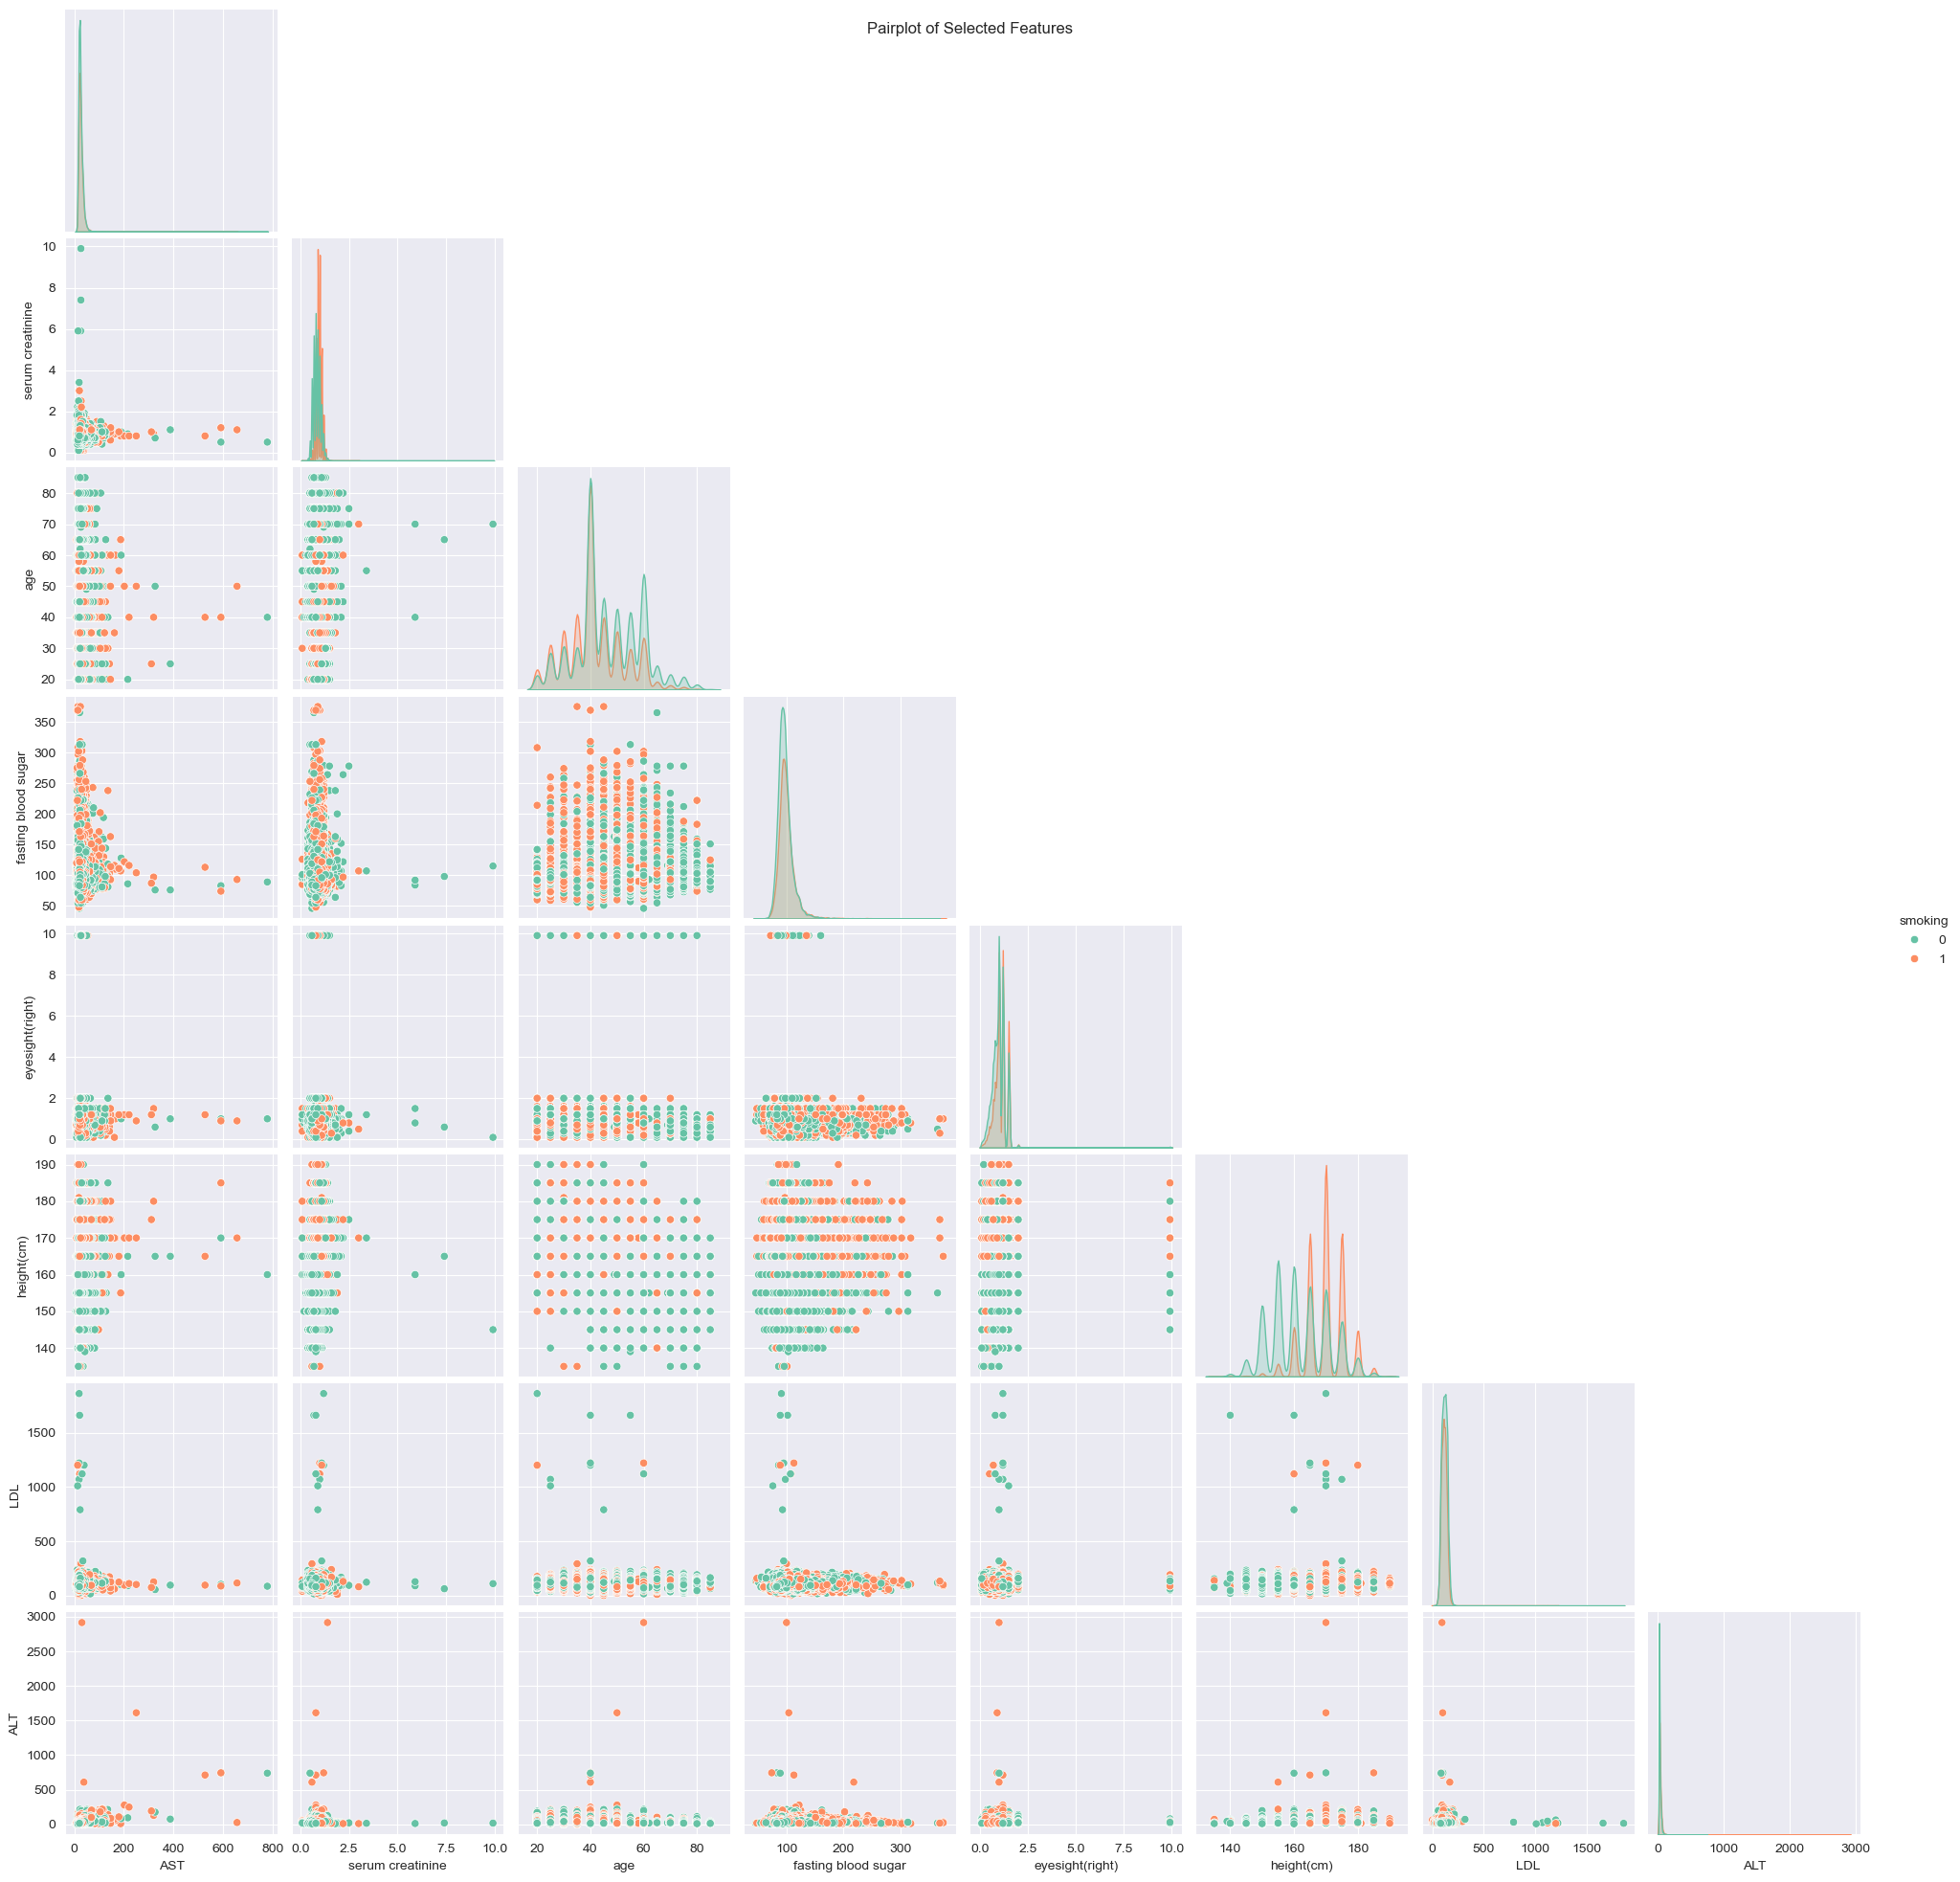

In [63]:
# Pairplot:
print("Generating Pairplot for Selected Features...")
sns.pairplot(data,hue='smoking',palette='Set2', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Features")
plt.show()

In [64]:
print("\nMultivariate Analysis Insights:")
print("\n1. Strongest Feature Correlations:")
# Get top 5 strongest correlations
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlations.append((correlation_matrix.index[i], 
                               correlation_matrix.columns[j], 
                               correlation_matrix.iloc[i,j]))
    
correlations.sort(key=lambda x: abs(x[2]), reverse=True)
for feat1, feat2, corr in correlations[:5]:
    print(f"{feat1} - {feat2}: {corr:.3f}")

print("\n2. PCA Insights:")
explained_var_ratio = pca_for_replacement.explained_variance_ratio_
print(f"First 3 components explain {sum(explained_var_ratio[:3])*100:.2f}% of variance")


Multivariate Analysis Insights:

1. Strongest Feature Correlations:
AST - ALT: 0.623
age - height(cm): -0.490
serum creatinine - height(cm): 0.460
height(cm) - smoking: 0.447
age - eyesight(right): -0.278

2. PCA Insights:
First 3 components explain 58.83% of variance


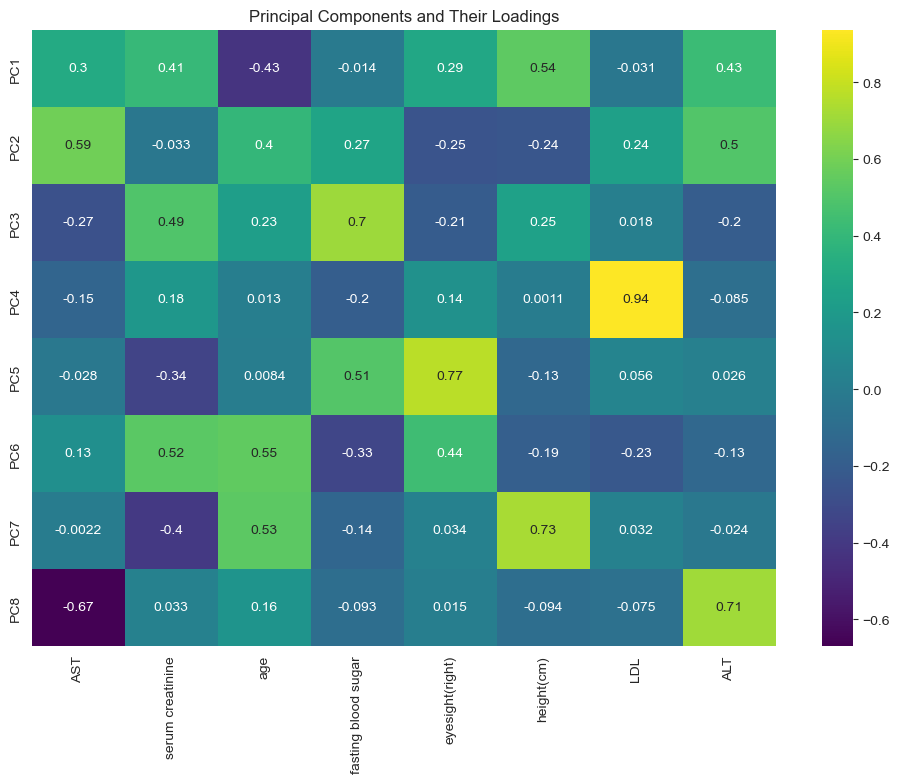

In [65]:
# Heatmap for loadings
plt.figure(figsize=(12, 8))
sns.heatmap(pca_for_replacement.components_, cmap='viridis', annot=True, xticklabels=numeric_columns_for_pca, yticklabels=[f'PC{i+1}' for i in range(len(numeric_columns_for_pca))])
plt.title('Principal Components and Their Loadings')
plt.show()